# BATERÍAS DE PRUEBAS

En el presente documento se han ejecutado baterías de pruebas para buscar las definiciones de la herramientas de preprocesamiento y análisis lo más robustas posibles.

Se ha empleado la librería 'test_batch' creada precisamente para este objetivo.

Esta librería permite, por un lado, crear diferentes instancias del agente en las que cada una emplea la herramienta construída con una de las descripiones proporcionadas y, por otro, ejecutar uno a uno todos los 'prompts' de la lista para cada una de estas instancias del agente. En realidad, por cada descripción proporcionada, la librería crea dos versiones distintas del agente, una en la que se le ha proporcionado la herramienta cuya descripción presenta indentaciones para organizar el texto y otra sin indentaciones. Esto se ha hecho así porque proporcionar o no el texto con o sin identaciones arroja diferentes resultados y no hay un comportamiento consistente por el que se pueda decir que uno de los dos métodos sea claramente superior, tal y como se verá en la tabla resumen.

In [2]:
import	test_batch

## Pruebas de la Herramienta de Preprocesamiento.

### Construcción de las instancias del agente.

#### Lista de descripciones para la herramienta de preprocesamiento.

In [2]:

description_list	= \
{	'1'		:
(	"This tool preprocesses datasets for the AnomalyBert anomaly analyzer and generates a directory for the preprocessed data."
,	"Mandatory Input Parameters:\
		'dataset' (the type of dataset, permitted options are SWaT, SMAP, MSL, and WADI),\
		'input_dir' (the input directory of the raw data, it must be a path written as a raw string).\
	 Optional Input Parameters:\
		'output_dir' (the output directory for the preprocessed data, it must be a path written as a raw string),\
		'json_dir' (the directory where the JSON files will be saved if created. It must be a path written as a raw string),\
		'date_label' (the date label for WADI datasets)\
		'dataset_mode' (the type of process the dataset is intended for, valid options are train, test, and exploitation)."
,	"As output, it returns the path of the files where the preprocessed data has been stored."
)
,	'2'		:
(	"This tool preprocesses datasets of raw data for the AnomalyBert anomaly analyzer and generates a directory for the preprocessed data.\
	 Input parameters need to be explicitly stated with the specified name when used,\
	 and optional parameters should be avoided if not mentioned by the user in their prompt."
,	"Mandatory Input Parameters:\
		'dataset' (the type of dataset, permitted options are SWaT, SMAP, MSL, and WADI),\
		'input_dir' (the input directory of the raw data, it must be a path written as a raw string).\
	 Optional Input Parameters (these parameters should be proviomitted if not explicitly mentioned by the user):\
		'output_dir' (the output directory for the preprocessed data, it must be a path written as a raw string),\
		'json_dir' (the directory where the JSON files will be saved if created. It must be a path written as a raw string),\
		'date_label' (the date label for WADI datasets)\
		'dataset_mode' (the type of process the dataset is intended for, valid options are train, test, and exploitation)."
,	"As output, it returns the path of the files where the preprocessed data has been stored."
)
,	'3'		:
(	"This tool preprocesses datasets of raw data for the AnomalyBert anomaly analyzer and generates a directory for the preprocessed data.\
	 Input parameters need to be explicitly stated with the specified name when used,\
	 and optional parameters should be avoided if not mentioned by the user in their prompt."
,	"Mandatory Input Parameters:\
		'dataset' (the type of dataset, permitted options are SWaT, SMAP, MSL, and WADI),\
		'input_dir' (the input directory of the raw data, it must be a path written as a raw string).\
	 Optional Input Parameters (when using this function, optional parameters should be assigned values using keyword arguments;\
	 only provide these keyword arguments if their values are needed; otherwise, omit them entirely):\
		'output_dir' (the output directory for the preprocessed data, it must be a path written as a raw string),\
		'json_dir' (the directory where the JSON files will be saved if created. It must be a path written as a raw string),\
		'date_label' (the date label for WADI datasets)\
		'dataset_mode' (the type of process the dataset is intended for, valid options are train, test, and exploitation)."
,	"As output, it returns the path of the files where the preprocessed data has been stored."
)
,	'4'		:
(	"This auxiliary tool is designed to support the primary process of satellite telemetry data analysis for anomaly detection using AnomalyBERT.\
	 The specific task of this tool is to preprocess the dataset, preparing it for subsequent analysis.\
	 This involves cleaning, normalizing, and transforming the raw telemetry data to ensure it is in an optimal format for the AnomalyBERT detection process."
,	"Mandatory Input Parameters:\
		'dataset' (the type of dataset, permitted options are SWaT, SMAP, MSL, and WADI),\
		'input_dir' (the input directory of the raw data, it must be a path written as a raw string).\
	 Optional Input Parameters (when using this function, optional parameters should be assigned values using keyword arguments;\
	 only provide these keyword arguments if their values are needed; otherwise, omit them entirely):\
		'output_dir' (the output directory for the preprocessed data, it must be a path written as a raw string),\
		'json_dir' (the directory where the JSON files will be saved if created. It must be a path written as a raw string),\
		'date_label' (the date label for WADI datasets)\
		'dataset_mode' (The 'dataset_mode' parameter specifies the intended use and purpose of the dataset and can take one of the following values:\
			'train', indicates that the dataset will be used for training the neural network, so it is labeled and provides the train and test partitions;\
			'test', indicates that the dataset will be used just for testing the already trained neural network, so it is also labeled but only has the test partion;\
			'exploitation', indicates that the dataset is intended to be analyzed and detect its anomalies (inference), so it's not labeled.)."
,	"As output, it returns the path of the files where the preprocessed data has been stored."
)
}

In [5]:
# description_list_2	=	[	(
# 							)
# 						]

#### La lista de instancias del agente.

In [3]:
agent_list		= test_batch.tool_variant_agents( test_batch.AnomalyBERT_Data_Preprocessing_Tool , description_list )

In [ ]:
# agent_list_2	= test_batch.tool_variant_agents( test_batch.AnomalyBERT_Data_Preprocessing_Tool , description_list_2 )

 ### Ejecución de las pruebas.

#### Lista de 'prompts'.

In [4]:
prompt_list		= 	\
	{	'1'		:	"Preprocess the WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'."
	,	'2'		:	"Preprocess the raw WADI dataset stored in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'."
	,	'3'		:	"Preprocess the WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and store it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'4'		:	"Preprocess the WADI dataset stored in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'5'		:	"Preprocess the WADI dataset stored in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and store it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'6'		:	"Preprocess for testing the WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and store it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'7'		:	"The WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' is meant for testing. Preprocess it and store it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	}

In [5]:
prompt_list_2	=	\
	{	'8'		:	"Preprocess the testing WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and store it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'9'		:	"Preprocess the testing WADI dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and store it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'10'	:	"Preprocess the testing WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'11'	:	"Preprocess the testing WADI dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	}

#### Resultados.

In [6]:
test_batch.prompt_tests( agent_list , "tool description" , prompt_list )

'RESULTS FOR TOOL DESCRIPTION 1:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Preprocessed_WADI'
date_label = None
dataset_mode = 'train'

path_to_preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored in {path_to_preprocessed_data}.")
====


'The preprocessed data has been stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Preprocessed_WADI.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'preprocessed_data'
json_dir = ''
date_label = ''
dataset_mode = 'train'
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset, input_dir, output_dir, json_dir, date_label, dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_resul

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
wadi_dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
date_label = ''  # No date label is needed for WADI datasets
dataset_mode = 'train'  # Preprocess the dataset for training
preprocessed_dir = AnomalyBERT_Data_Preprocessing(wadi_dataset, input_dir, output_dir, date_label, dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools,

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=input_dir, output_dir=output_dir, date_label=None, dataset_mode=None)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = 'unknown'
dataset_mode = 'train'
dataset = 'WADI'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, json_dir=None, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.unknown/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.unknown/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''  # not needed for WADI dataset
dataset_mode = 'test'

preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset, input_dir, output_dir, date_label, dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Pyth

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None
dataset_mode = 'test'

preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored in {preprocessed_data_path}.")
====


'The preprocessed data has been stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2.'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 1-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas_preprocessed'
date_label = '2021-07-21'
dataset_mode = 'train'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored at {preprocessed_data_path}")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.2021-07-21/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evalu

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.2021-07-21/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Processed_WADI'
date_label = 'YYYY-MM-DD'
dataset_mode = 'train'
processed_path = AnomalyBERT_Data_Preprocessing(input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored at {processed_path}")
====
Error in execution: __call__() missing 1 required positional argument: 'dataset'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\si

"Error in execution: __call__() missing 1 required positional argument: 'dataset'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''  # no date label for WADI
dataset_mode = 'train'  # default mode, or test or exploitation
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored at {preprocessed_path}.")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppDat

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:

====


None

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = 'date'
dataset_mode = 'train'
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset, input_dir, output_dir, json_dir=None, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.date/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, av

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.date/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''
dataset_mode = 'test'

preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"Preprocessed data path is {preprocessed_data_path}")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\age

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None
dataset_mode = 'test'
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset, input_dir, output_dir, date_label, dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.test/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, sta

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.test/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 2:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
output_dir = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Preprocessed'
date_label = '2022-01-01'
dataset_mode = 'train'
path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.2022-01-01/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoi

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.2022-01-01/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
preprocessed_dataset = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None
dataset_mode = 'train'
path_preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
date_label = None
dataset_mode = None

preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"Preprocessed data stored at: {preprocessed_path}")
====


'Preprocessed data stored at: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = "C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas"
output_dir = "C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2"
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 2-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas\Preprocessed'
date_label = '2022-07-08'
dataset_mode = 'train'
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored in {preprocessed_dir}.")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.2022-07-08/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.pytho

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.2022-07-08/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = None
date_label = None
dataset_mode = None
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"Preprocessed data stored in {preprocessed_dir}")
====


'Preprocessed data stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'

processed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label='2022', dataset_mode='train')
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.2022/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.2022/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=None, dataset_mode=None)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None
dataset_mode = 'train'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''
dataset_mode = 'test'

preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
dataset_mode = 'test'
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored in {preprocessed_dir}.")
====


'The preprocessed data has been stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2.'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 3:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = None  # No need to specify output_dir as it will be automatically generated
date_label = None  # No need to specify date_label as it's not necessary for WADI dataset
dataset_mode = None  # No need to specify dataset_mode as it's not necessary for preprocessed data
path_preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(path_preprocessed_data)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas_out'
date_label = 'None'
dataset_mode = 'train'
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
AnomalyBERT_Data_Preprocessing(input_dir=input_dir, dataset=dataset, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.None/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppDa

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.None/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
answer = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
list index out of range
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 423, in extract_action
    split[-2],
IndexError: list index out of range


'ERROR: the agent raised a catastrophic error while trying to generate the code to run.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', output_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
AnomalyBERT_Data_Preprocessing(dataset='WADI', 
                               input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', 
                               output_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = "C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas"
output_dir = "C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2"
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
print(f"Preprocessed data stored at {preprocessed_data_path}")
====


'Preprocessed data stored at C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 3-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset='WADI'
input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir='/output/WADI/'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: '/output/WADI/'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Pyth

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: '/output/WADI/'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
dataset = 'WADI'
output_dir = 'path/to/output/directory'  # specify the output directory
json_dir = 'path/to/json/directory'  # specify the json directory
date_label = 'date_label'  # specify the date label
dataset_mode = 'train'  # specify the dataset mode

AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, \
                                output_dir=output_dir, json_dir=json_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path/to/output/directory'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path/to/output/directory'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''
dataset_mode = 'train'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_actio

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', output_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None
dataset_mode = 'train'
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
print(f"Preprocessed data stored at: {preprocessed_dir}")
====


'Preprocessed data stored at: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
preprocessed_dir = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, dataset_mode='test')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing('WADI', 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas')
print(f"The path of the preprocessed data is {preprocessed_dataset_path}.")
====


'The path of the preprocessed data is C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
output_dir = 'C:\\temp\\output'
dataset_mode = 'exploitation'
output_files_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir=output_dir, dataset_mode=dataset_mode)
print(f"Preprocessed data stored at: {output_files_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\temp\\output'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in eva

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\temp\\\\output'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=input_dir, output_dir=output_dir)
print(f"Preprocessed data path: {preprocessed_path}")
====


'Preprocessed data path: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None  # assuming date_label is not needed for WADI dataset
dataset_mode = 'test'  # assuming this mode is suitable for preprocessing

AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset_mode = 'exploitation'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
date_label = None
dataset = 'WADI'
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset_mode = 'test'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
dataset = 'WADI'
date_label = None
json_dir = None
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, dataset_mode=dataset_mode, date_label=date_label, json_dir=json_dir)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
print("Preprocessed data is stored in", preprocessed_data_path)
====


'Preprocessed data is stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\preprocessed'
date_label = 'None'
dataset_mode = 'train'
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(preprocessed_data_path)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.None/WADI_14days_new.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.None/WADI_14days_new.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Preprocess the raw WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas\Preprocessed'
json_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas\Json'
date_label = None
dataset_mode = 'train'

preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, json_dir=json_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"Preprocessed data stored at: {preprocessed_data_path}")
====


'Preprocessed data stored at: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\Preprocessed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Preprocess the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = 'date_label'
dataset_mode = 'test'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"Preprocessed data stored at {preprocessed_data_path}")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.date_label/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transfo

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.date_label/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''
dataset_mode = 'train'
processed_path = AnomalyBERT_Data_Preprocessing(dataset, input_dir, output_dir, date_label, dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\a

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Preprocess the WADI dataset stored in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=input_dir, output_dir=output_dir, dataset_mode='train')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Preprocess for testing the WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
The WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' is meant for testing. Preprocess it and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
wadi_dataset_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
dataset_mode = 'test'
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=wadi_dataset_dir, output_dir=output_dir, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [7]:
test_batch.prompt_tests( agent_list , "tool description" , prompt_list_2 )

'RESULTS FOR TOOL DESCRIPTION 1:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=input_dir, output_dir=output_dir, dataset_mode='test')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''
dataset_mode = 'test'

preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, json_dir='', date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\User

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
dataset = 'WADI'
dataset_mode = 'test'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
dataset = 'WADI'
dataset_mode = 'test'
output = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, dataset_mode=dataset_mode)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 1-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', output_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = 'test'
dataset_mode = 'test'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.test/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, avail

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.test/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = ''
dataset_mode = 'test'
preprocessed_dir = AnomalyBERT_Data_Preprocessing(
    dataset=dataset, 
    input_dir=input_dir, 
    output_dir=output_dir, 
    json_dir='', 
    date_label=date_label, 
    dataset_mode=dataset_mode
)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, st

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
path_input = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
path_output = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=path_input, output_dir=path_output, date_label='', dataset_mode='test')
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 2:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir=output_dir)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
preprocessed_dataset = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas')
print(f"Preprocessed dataset saved at: {preprocessed_dataset}")
====


'Preprocessed dataset saved at: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
output = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 2-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset_path = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_path = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=dataset_path, output_dir=output_path, date_label='월', dataset_mode='test')
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.월/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.st

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.월/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = 'date_label' # assuming this is the default value
dataset_mode = 'test'

preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored in {preprocessed_data_path}.")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.date_label/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zo

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.date_label/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
result = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2', date_label=None, dataset_mode='test')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 3:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = r"C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas"
output_dir = r"C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2"
path = AnomalyBERT_Data_Preprocessing(dataset, input_dir, output_dir, date_label="", dataset_mode="test")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Pyt

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
processed_data_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
dataset = "WADI"
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
```. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 98, in parse_code_blob
    return match.group(1).strip()
AttributeError: 'No

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \ndataset = "WADI"\ninput_dir = r\'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\'\noutput_dir = r\'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2\'\npreprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)\n```. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
test_wadi_dataset = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None
dataset_mode = 'test'
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=test_wadi_dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\SWaT/Physical\\SWaT_Dataset_Attack_v0.xlsx'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = 

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\SWaT/Physical\\\\SWaT_Dataset_Attack_v0.xlsx'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 3-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir)
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', output_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2')
print(f"Preprocessed data saved at {preprocessed_data_path}.")
====


'Preprocessed data saved at C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2.'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
testing_dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset=testing_dataset, input_dir=input_dir, output_dir=output_dir)
print(f'The preprocessed data is stored at {preprocessed_data_path}')
====


'The preprocessed data is stored at C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
dataset = 'WADI'
date_label = ''
dataset_mode = 'test'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_too

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = "WADI"
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
dataset_mode = 'test'
preprocessed_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, dataset_mode=dataset_mode)
print(f"The preprocessed dataset has been saved in {preprocessed_path}")
====


'The preprocessed dataset has been saved in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
AnomalyBERT_Data_Preprocessing(dataset='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2')
====


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=None, dataset_mode='test')
====
Error in execution: The code generated by the agent is not valid.
unexpected character after line continuation character (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 5

'Error in execution: The code generated by the agent is not valid.\nunexpected character after line continuation character (<unknown>, line 1). Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and store it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = None
dataset_mode = 'test'
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"Preprocessed dataset stored at {preprocessed_dataset_path}")
====


'Preprocessed dataset stored at C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess the testing WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'
date_label = ''
dataset_mode = 'test'
path = AnomalyBERT_Data_Preprocessing(dataset=dataset, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
print(f"The preprocessed data has been stored at {path}.")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py"

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI./WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Preprocess the testing WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
date_label = 'date_label'  # not applicable for WADI dataset
dataset_mode = 'test'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset, input_dir, output_dir, date_label, dataset_mode)
print(f"The preprocessed data is stored in {preprocessed_data_path}.")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.test/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.test/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'TEST END'

## Pruebas de la Herramienta de Análisis.

### Construcción de las instancias del agente.

#### Lista de descripciones para la herramienta de análisis.

In [3]:
description_list	= \
{	'1'		:
(	"This tool is the primary process of satellite telemetry data analysis for anomaly detection using AnomalyBERT,\
	 which needs the data to be already prerocessed.\
	 It takes as input the type of dataset (implemented for SWaT/SMAP/MSL/WADI) and returns its plot with the anomalies higlighted."
,	"Mandatory Input Parameters:\
		 - 'dataset_type' (the type of dataset, permitted options are SWaT, SMAP, MSL, and WADI),\
	 Optional Input Parameters (when using this function, optional parameters should be assigned values using keyword arguments;\
	 only provide these optional parameters if their values are needed; otherwise, omit them entirely):\
		 - 'preprocessed_dataset_folder' (the input directory of the preprocessed data, it must be a path written as a raw string).\
		 - 'dataset_mode' (The 'dataset_mode' parameter specifies the intended use and purpose of the dataset and can take one of the following values:\
			 * 'train', indicates that the dataset will be used for training the neural network, so it is labeled and provides the train and test partitions;\
			 * 'test', indicates that the dataset will be used just for testing the already trained neural network, so it is also labeled but only has the test partion;\
			 * 'exploitation', indicates that the dataset is intended to be analyzed and detect its anomalies (inference), so it's not labeled.)."
,	"As output, it returns the path of the files where the anomaly scores have been stored after the analysis and plots the results."
)
,	'2'		:
(	"This tool is designed for anomaly detection in satellite telemetry data using AnomalyBERT.\
 	 It requires preprocessed data as input and works with specific datasets (SWaT, SMAP, MSL, WADI).\
 	 The tool highlights anomalies in the dataset and returns a plot of the results."
,	"Mandatory Input Parameters:\
		 - 'dataset_type': The dataset type (options: SWaT, SMAP, MSL, WADI).\
	 Optional Input Parameters (use keyword arguments):\
		 - 'preprocessed_dataset_folder': Path to the preprocessed dataset folder (raw string format).\
		 - 'dataset_mode': Defines the dataset's purpose:\
				 * 'train': Used for training with labeled data (train and test partitions).\
    			 * 'test': For testing with labeled data (test partition only).\
    			 * 'exploitation': For inference and anomaly detection (no labels)."
,	"The output includes the file paths of the anomaly scores and a plot visualizing the detected anomalies."
)
,	'3'		:
(	"This tool facilitates the analysis of satellite telemetry data for anomaly detection using AnomalyBERT.\
	 The input dataset must be preprocessed and of a supported type (SWaT, SMAP, MSL, or WADI).\
	 After analyzing, the tool highlights any detected anomalies and provides a visualization."
,	"Mandatory Input Parameters:\
		 - 'dataset_type': Specify one of the supported datasets (SWaT, SMAP, MSL, WADI).\
	 Optional Input Parameters (use keyword arguments):\
		 - 'preprocessed_dataset_folder': Path to the folder containing preprocessed data (as a raw string).\
		 - 'dataset_mode': Defines the operational mode for the dataset:\
			 * 'train': For labeled data used to train the neural network (includes train/test partitions).\
			 * 'test': For labeled data used to evaluate the neural network (only test partition).\
			 * 'exploitation': For running anomaly detection in unlabeled datasets (inference)."
,	"The tool outputs the file paths containing anomaly scores and generates a plot to visualize the anomalies."
)
,	'4'		:
(	"This tool performs anomaly detection on satellite telemetry datasets using the AnomalyBERT model.\
	 It requires that the input data be preprocessed beforehand and supports specific datasets: SWaT, SMAP, MSL, and WADI.\
	 The tool analyzes the data, identifies anomalies, and generates a plot that visually highlights these anomalies."
,	"Mandatory Input Parameters:\
		 - 'dataset_type': Type of dataset to be analyzed (SWaT, SMAP, MSL, WADI).\
	 Optional Input Parameters (provided via keyword arguments):\
		 - 'preprocessed_dataset_folder': Directory path where the preprocessed dataset is stored (as a raw string).\
		 - 'dataset_mode': Defines how the dataset is used:\
			 * 'train': For training purposes, the dataset is labeled and includes both training and testing data.\
    		 * 'test': Used to test a trained model, the dataset is labeled but contains only test data.\
    		 * 'exploitation': For detecting anomalies in an unlabeled dataset (used for inference)."
,	"The output includes the paths to the files containing the anomaly scores and generates a plot with the anomalies clearly marked."
)
}

#### La lista de instancias del agente.

In [4]:
agent_list		= test_batch.tool_variant_agents( test_batch.AnomalyBERT_Anomaly_Analysis_Tool , description_list )

 ### Ejecución de las pruebas.

#### Lista de 'prompts'.

In [5]:
prompt_list		= 	\
	{	'1'		:	"Could you analyse for anomalies the SWaT satelite dataset stored in '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'? The dataset is meant for testing and ans it is already preprocessed."
	,	'2'		:	"Analyze anomalies in the 'SWaT' dataset using default settings."
	,	'3'		:	"Detect anomalies in the 'WADI' dataset and return the results."
	,	'4'		:	"Identify anomalies in the 'WADI' dataset with default parameters."
	,	'5'		:	"Test the 'SWaT' dataset using preprocessed data from '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed' and return the anomaly scores."
	,	'6'		:	"Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'."
	,	'7'		:	"Run the tool in 'test' mode on the 'WADI' dataset from the directory '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'."
	,	'8'		:	"Run the anomaly detection on the 'WADI' dataset in 'test' mode."
	,	'9'		:	"Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies."
	,	'10'	:	"Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data."
	,	'11'	:	"Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder."
	,	'12'	:	"Run anomaly detection on the 'SWaT' dataset."
	,	'13'	:	"Use the analysing tool on 'SWaT' dataset with mode 'evaluation'."
	,	'14'	:	"Run the analysis on 'WADI' dataset in 'test' mode using data from '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'."
	,	'15'	:	"Analyse for anomaly detection model on the 'SWaT' dataset using data from '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed' and return the results."
	,	'16'	:	"Test the anomaly detection model on the 'WADI' dataset using data from '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'."
	,	'17'	:	"Analyze the 'WADI' dataset for anomalies using preprocessed data from '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed' in 'exploitation' mode."
	}

#### Resultados.

'RESULTS FOR TOOL DESCRIPTION 1:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'test'
anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder = preprocessed_dataset_folder, dataset_mode = dataset_mode)
print(f"Anomaly scores have been stored in {anomaly_scores_folder}.")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

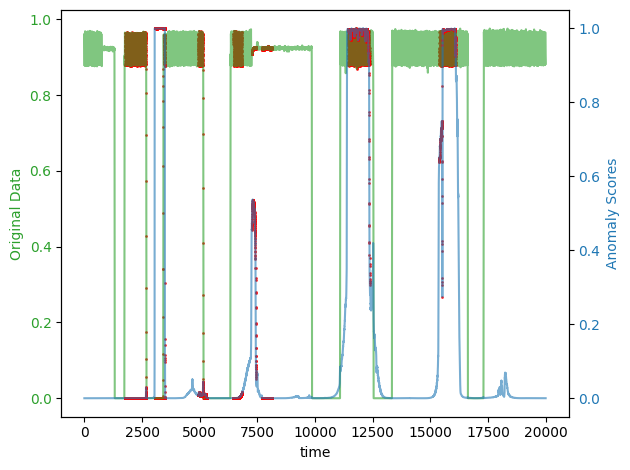

'Anomaly scores have been stored in \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
dataset_type = 'SWaT'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomalies highlighted plot stored at: {result}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

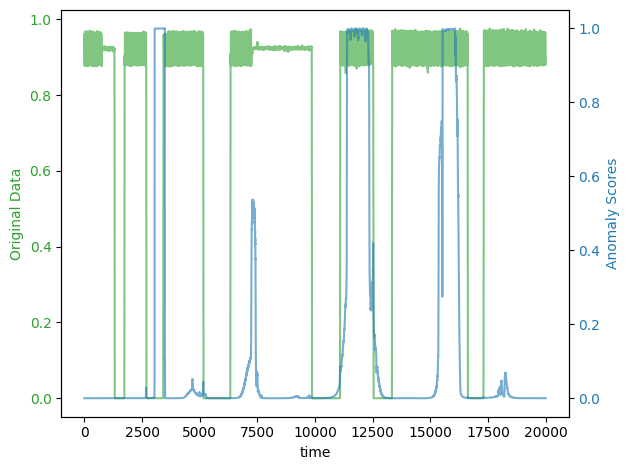

'Anomalies highlighted plot stored at: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
dataset_type = 'WADI'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"The anomaly scores have been stored at {result}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

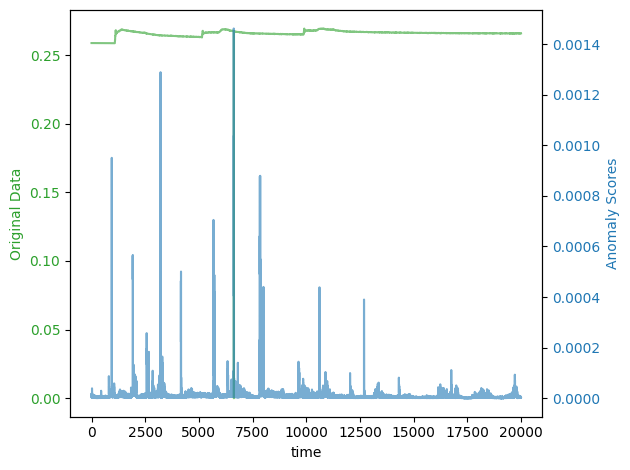

'The anomaly scores have been stored at \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='WADI')
print(f"Anomaly scores are stored at {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

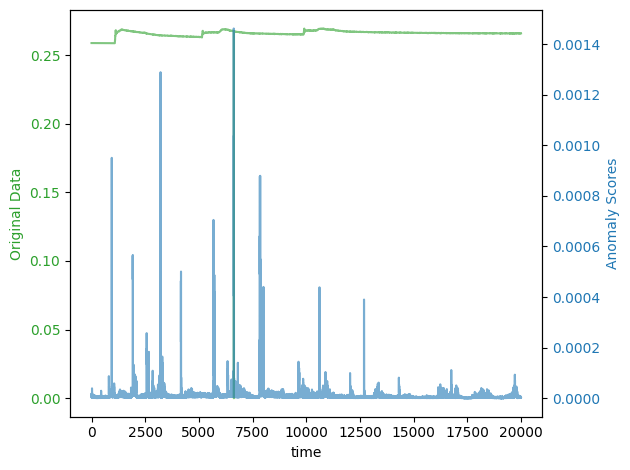

'Anomaly scores are stored at \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'

anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)

print("Anomaly scores: ", anomaly_scores)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

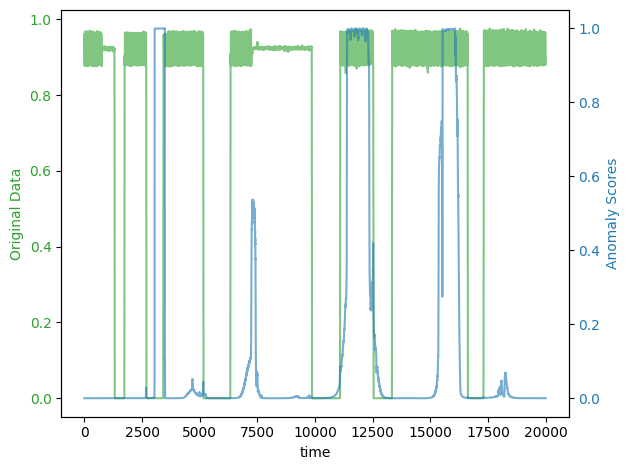

'Anomaly scores:  \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = "SWaT"
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
result_path = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode='exploitation')
print(f"The path where the anomaly scores have been stored is {result_path}.")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

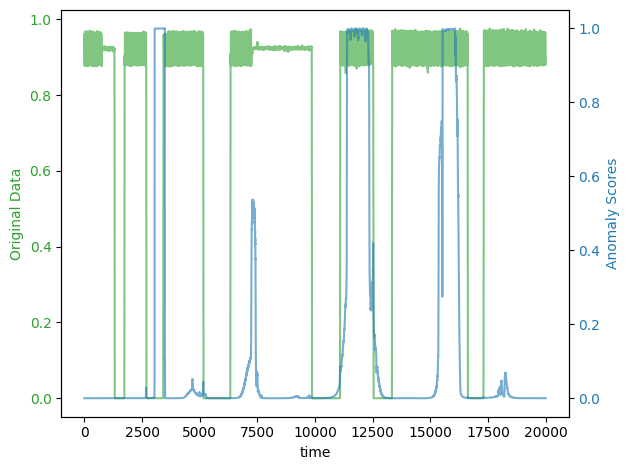

'The path where the anomaly scores have been stored is \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores stored in {anomaly_scores_path}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

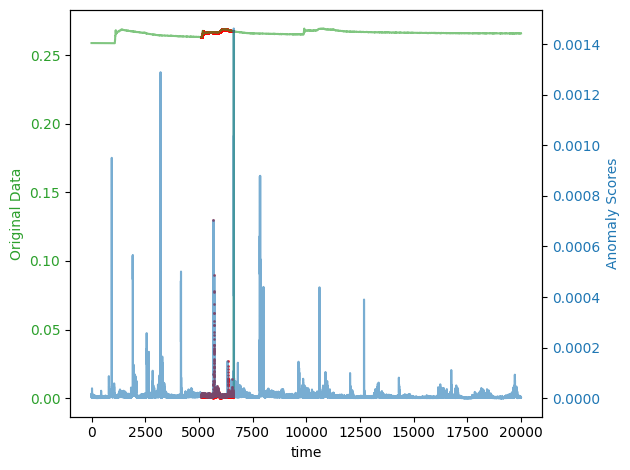

'Anomaly scores stored in \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode)
print(f"The anomaly detection result is {result}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

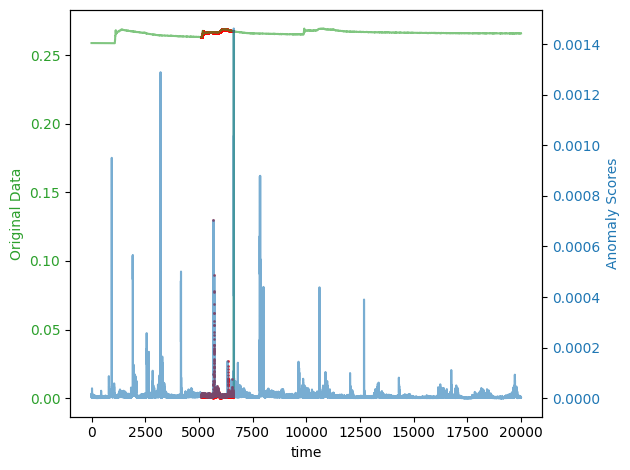

'The anomaly detection result is \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='exploitation')
print(f"The anomaly scores are stored in {anomaly_scores_folder}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

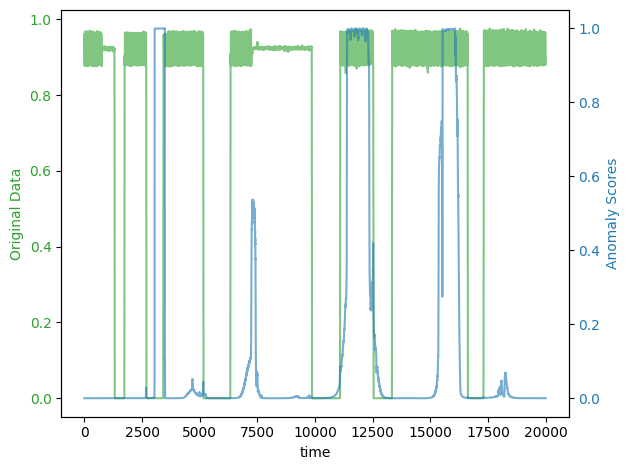

'The anomaly scores are stored in \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'exploitation'
preprocessed_dataset_folder = r'C:\path\to\preprocessed\data'

anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\path\\to\\preprocessed\\data\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\path\\\\to\\\\preprocessed\\\\data\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
path_to_files = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='train')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

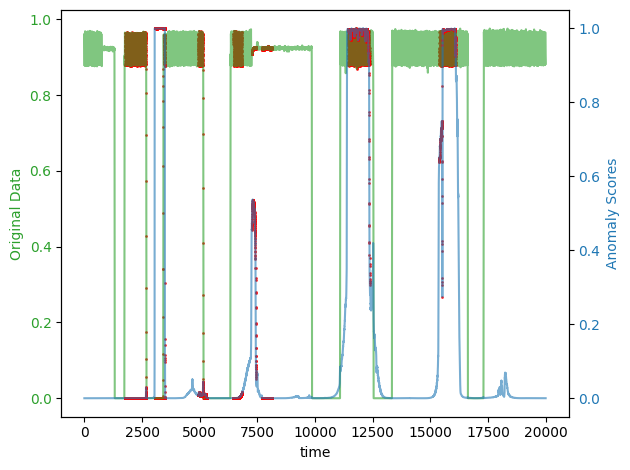

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
answer = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"The path of the files where the anomaly scores have been stored after the analysis are {answer}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

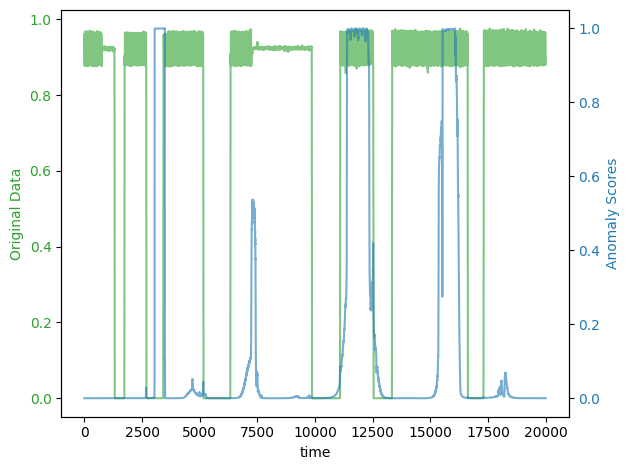

'The path of the files where the anomaly scores have been stored after the analysis are \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='evaluation')
print(f"The result is {result}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

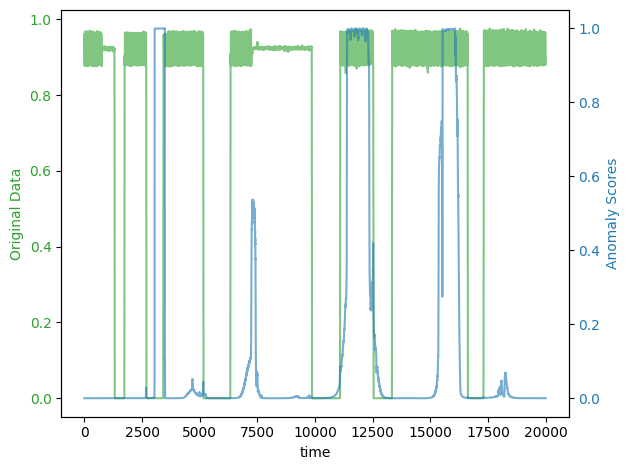

'The result is \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: ``` 
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The path of the files where the anomaly scores have been stored after the analysis and plots the results is {result}.")
```. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: ``` \ndataset_type = \'WADI\'\ndataset_mode = \'test\'\npreprocessed_dataset_folder = r\'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\'\nresult = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode, preprocessed_dataset_folder=preprocessed_dataset_folder)\nprint(f"The path of the files where the anomaly scores have been stored after the analysis and plots the results is {result}.")\n```. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'

result = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"The results are {result}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

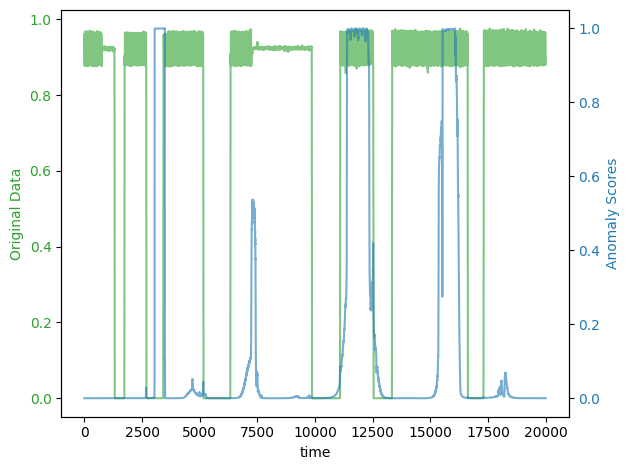

'The results are \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = "exploitation"
result = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"The path of the files where the anomaly scores have been stored after the analysis is {result}.")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

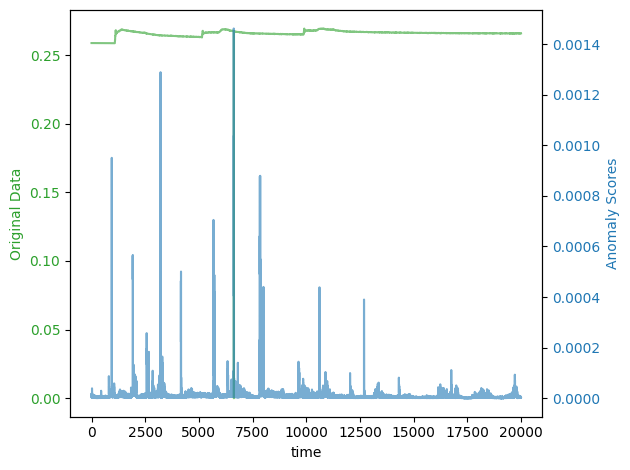

'The path of the files where the anomaly scores have been stored after the analysis is \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = "exploitation"
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(anomaly_scores_path)
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

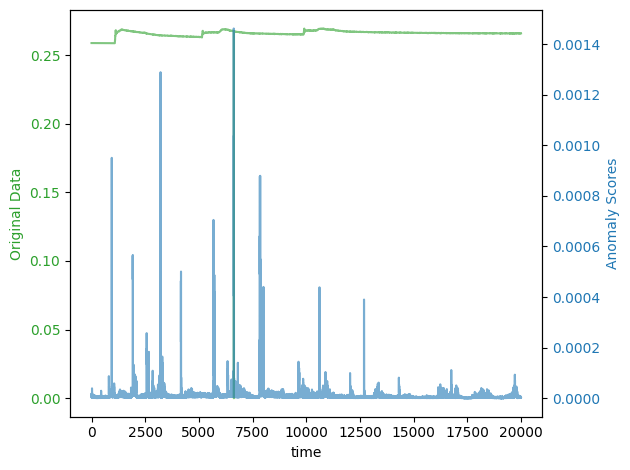

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 1-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The result is {result}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

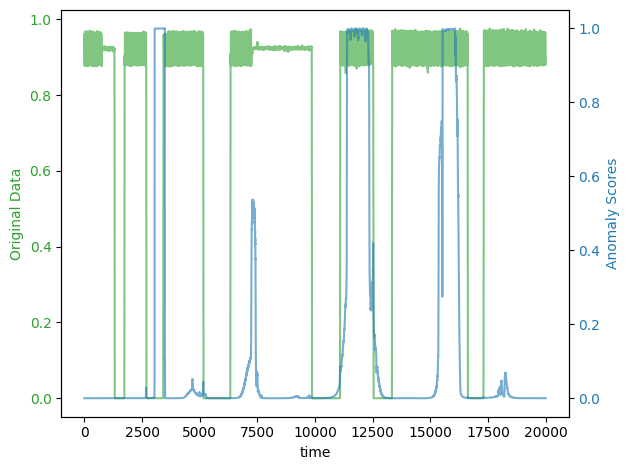

'The result is \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
dataset_type = "SWaT"
files_path = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomaly scores saved to {files_path}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

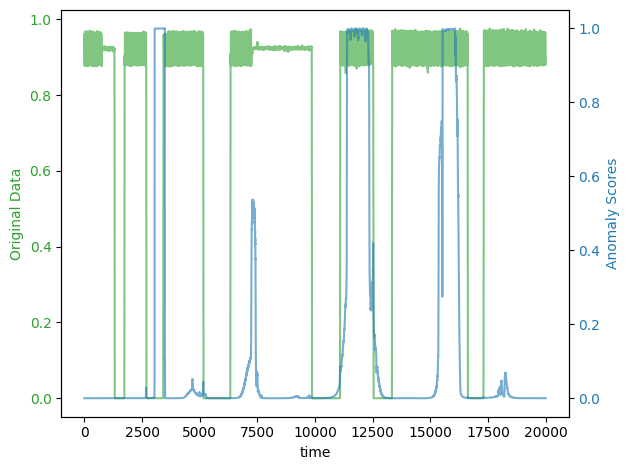

'Anomaly scores saved to \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = r'C:/Path/To/PreprocessedDataFolder'  # assign the path to the preprocessed data folder
dataset_mode = 'exploitation'  # specify the mode as 'exploitation' for anomaly detection
anomaly_results = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode)
print(f"Anomalies detected and results stored at {anomaly_results}")
====
Error in execution: [Errno 2] No such file or directory: 'C:/Path/To/PreprocessedDataFolder\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\pyt

"Error in execution: [Errno 2] No such file or directory: 'C:/Path/To/PreprocessedDataFolder\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder =...
dataset_mode = 'exploitation'

result = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: expected str, bytes or os.PathLike object, not ellipsis. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\py

'Error in execution: expected str, bytes or os.PathLike object, not ellipsis. Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

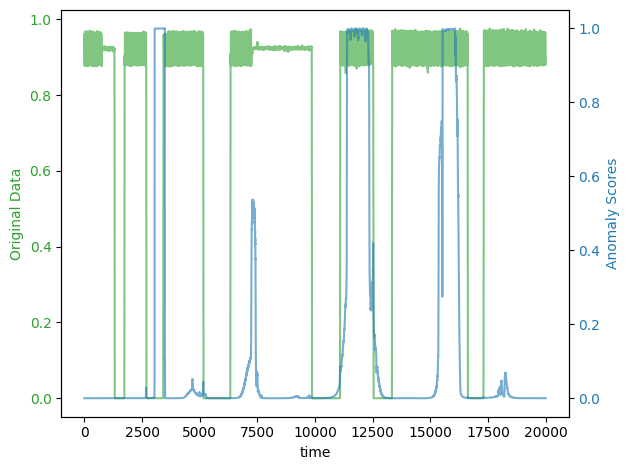

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

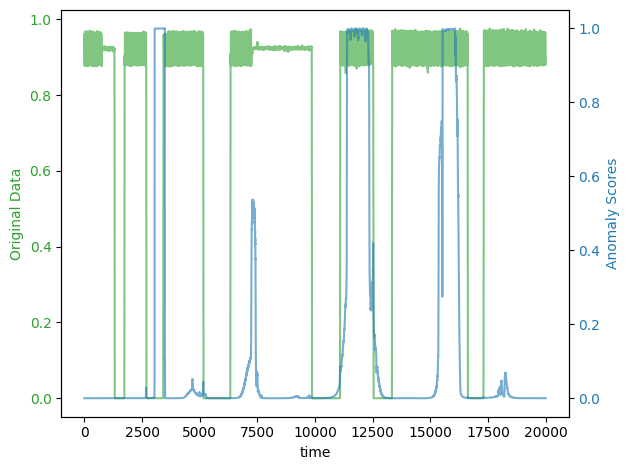

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
AnomalyBERT_Analyzer_result = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='test')
print(AnomalyBERT_Analyzer_result)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, m

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = r'C:\path\to\preprocessed\dataset'  # Adjust this to your actual preprocessed dataset folder
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\path\\to\\preprocessed\\dataset\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_as

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\path\\\\to\\\\preprocessed\\\\dataset\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
dataset_type = 'SWaT'
dataset_mode = 'exploitation'
preprocessed_dataset_folder = r'C:\path\to\preprocessed\dataset'
anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomalies detected in the {dataset_type} dataset have been stored in the folder '{anomaly_scores_folder}'.")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\path\\to\\preprocessed\\dataset\\SWaT_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformer

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\path\\\\to\\\\preprocessed\\\\dataset\\\\SWaT_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
dataset_mode = 'exploitation'
dataset_type = 'WADI'
preprocessed_dataset_folder = 'path_to_preprocessed_WADI_data'

AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_WADI_data\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transf

"Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_WADI_data\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='train')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

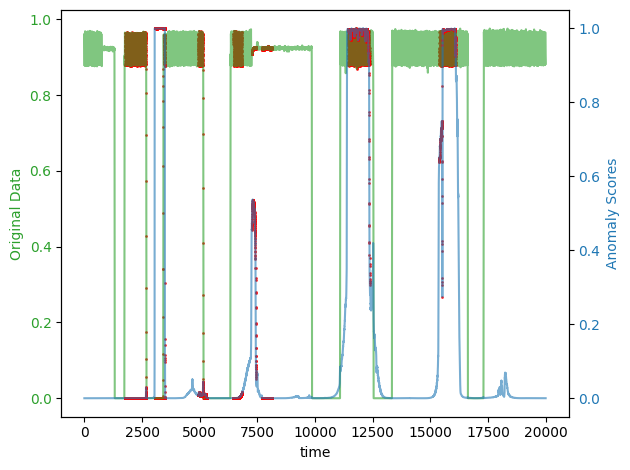

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"The anomaly plot for the {dataset_type} dataset is stored at {result}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

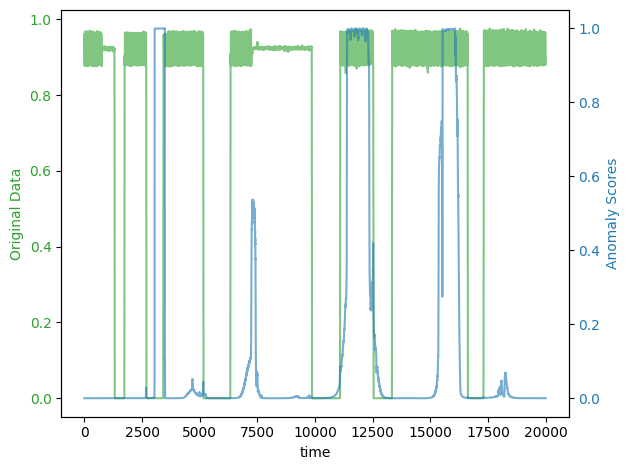

'The anomaly plot for the SWaT dataset is stored at \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
dataset_type = 'SWaT'
dataset_mode = 'evaluation'
result = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=r'C:\Path\To\Preprocessed\Folder', dataset_mode=dataset_mode)
print(f"Result: {result}")
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Path\\To\\Preprocessed\\Folder\\SWaT_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transf

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Path\\\\To\\\\Preprocessed\\\\Folder\\\\SWaT_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
result_path = AnomalyBERT_Analyzer(dataset_type = dataset_type, dataset_mode = dataset_mode, preprocessed_dataset_folder = preprocessed_dataset_folder)
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

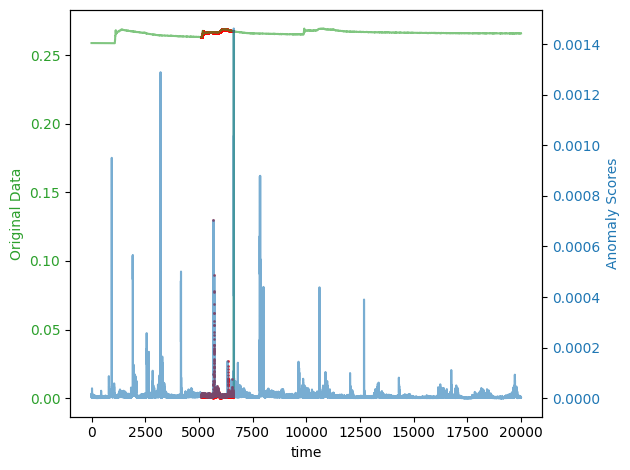

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The result is {result}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

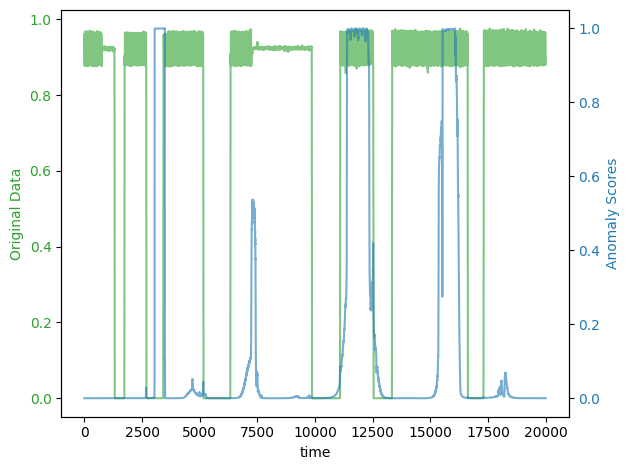

'The result is \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly scores have been stored in: {anomaly_scores_path}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

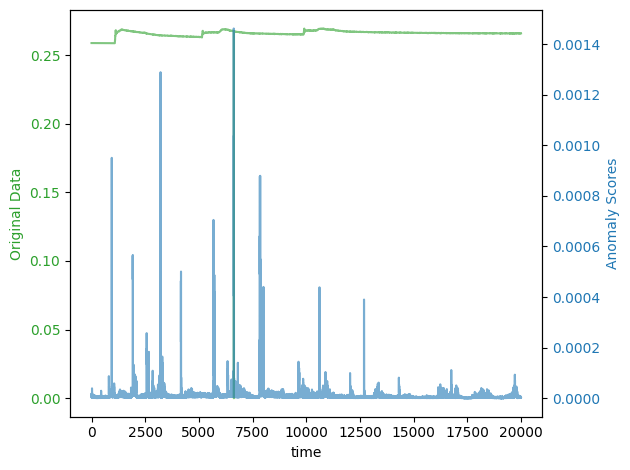

'Anomaly scores have been stored in: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

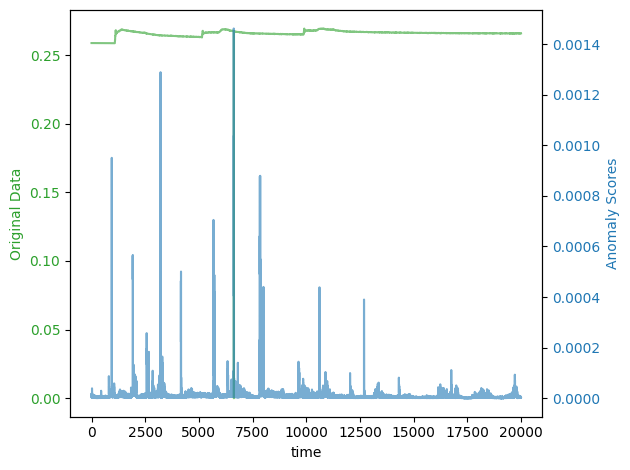

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 2:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\l

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

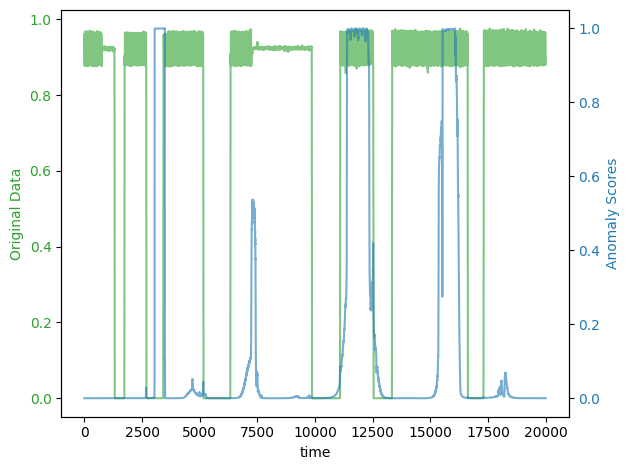

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
anomaly_results = AnomalyBERT_Analyzer(dataset_type='WADI')
print(f"Anomaly results: {anomaly_results}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

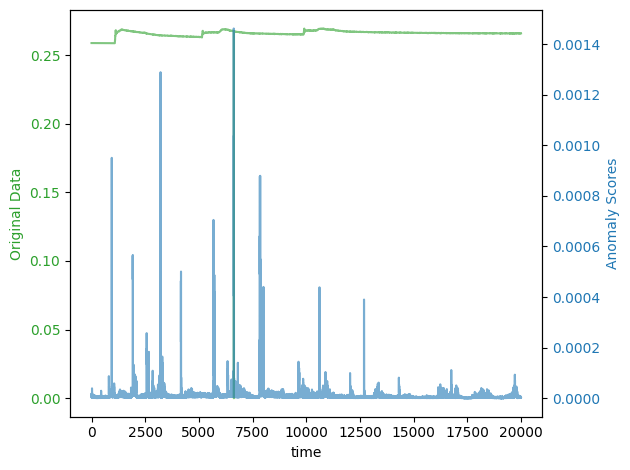

'Anomaly results: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
dataset_type = 'WADI'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"The anomaly scores are {anomaly_scores}.")
print(f"The plot of detected anomalies is {plot}.")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

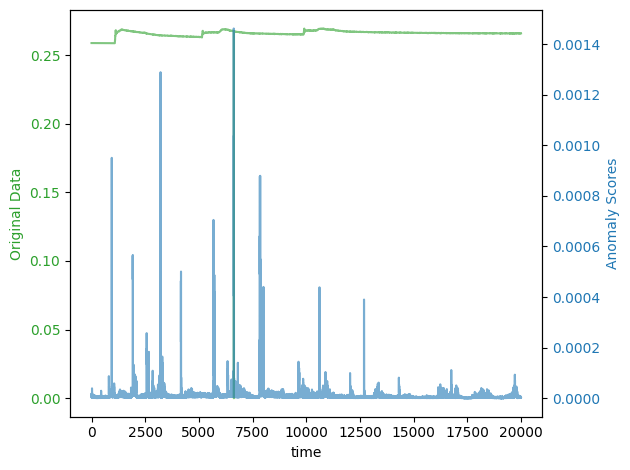

'The plot of detected anomalies is U.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(anomaly_scores)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in pars

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

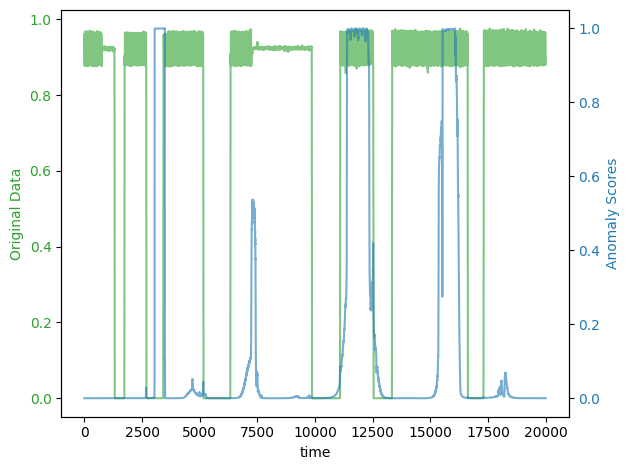

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type="WADI", dataset_mode="test")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

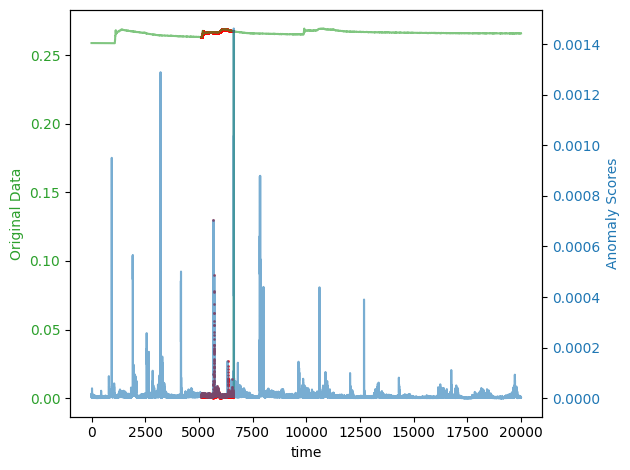

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
result = AnomalyBERT_Analyzer('preprocessed_dataset_folder', dataset_type=dataset_type, dataset_mode=dataset_mode)
print(f"Result: {result}")
====
Error in execution: __call__() got multiple values for argument 'dataset_type'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in evalu

"Error in execution: __call__() got multiple values for argument 'dataset_type'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
dataset_type = 'SWaT'
results = AnomalyBERT_Analyzer('preprocessed_dataset_folder'=your_preprocessed_dataset_folder, 'dataset_mode'=exploitation)
print(f"Anomaly scores: {results}")
```. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 98, in parse_code_blob
    return match.group(1).strip()
AttributeError: 'NoneType' object has no attribute 'group'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Pyth

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \ndataset_type = \'SWaT\'\nresults = AnomalyBERT_Analyzer(\'preprocessed_dataset_folder\'=your_preprocessed_dataset_folder, \'dataset_mode\'=exploitation)\nprint(f"Anomaly scores: {results}")\n```. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='exploitation', preprocessed_dataset_folder='<path_to_preprocessed_data_folder>')
====
Error in execution: [Errno 22] Invalid argument: '<path_to_preprocessed_data_folder>\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in e

"Error in execution: [Errno 22] Invalid argument: '<path_to_preprocessed_data_folder>\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='train')
print(result)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

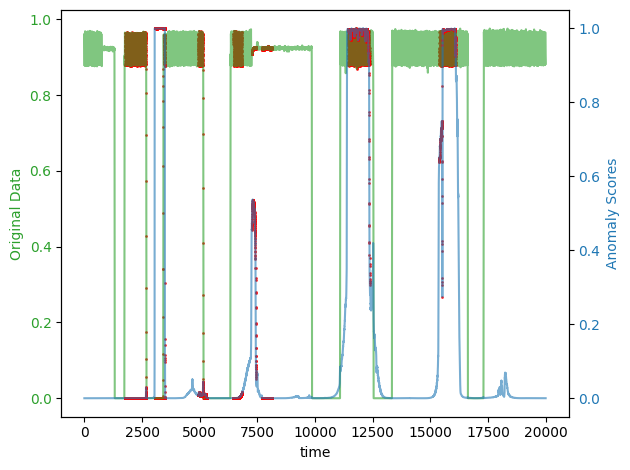

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '/path/to/preprocessed/dataset'  # Replace with actual path
dataset_mode = 'exploitation'

anomaly_scores, _ = AnomalyBERT_Analyzer(text=preprocessed_dataset_folder, dataset_type=dataset_type, dataset_mode=dataset_mode)

print("Anomaly scores obtained.")
====
Error in execution: __call__() got an unexpected keyword argument 'text'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roam

"Error in execution: __call__() got an unexpected keyword argument 'text'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
results = AnomalyBERT_Analyzer(dataset_type="SWaT", dataset_mode="evaluation")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

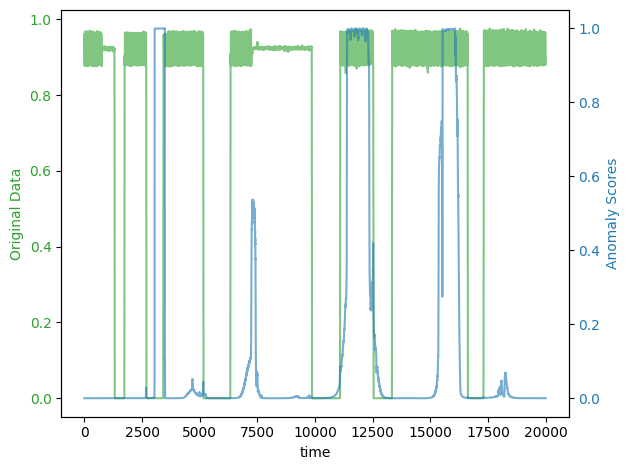

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
mode = 'test'
data_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=mode, preprocessed_dataset_folder=data_folder)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot: {plot}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'

results = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaco

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot: {plot}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

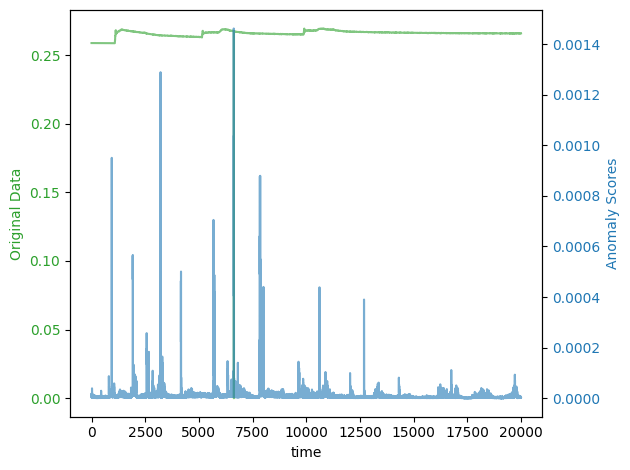

'Plot: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = r"C:\Users\zoiyy\OneDrive\DataSets\TFM\AnomalyBERT\processed"
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode="exploitation")
print(anomaly_scores)
print(plot)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Pyt

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\DataSets\\\\TFM\\\\AnomalyBERT\\\\processed\\\\WADI_test.npy'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 2-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'test'

anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression =

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
anomaly_bert_analyzer = AnomalyBERT_Analyzer(dataset_type='SWaT')
anomaly_scores = anomaly_bert_analyzer()
print(anomaly_scores)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

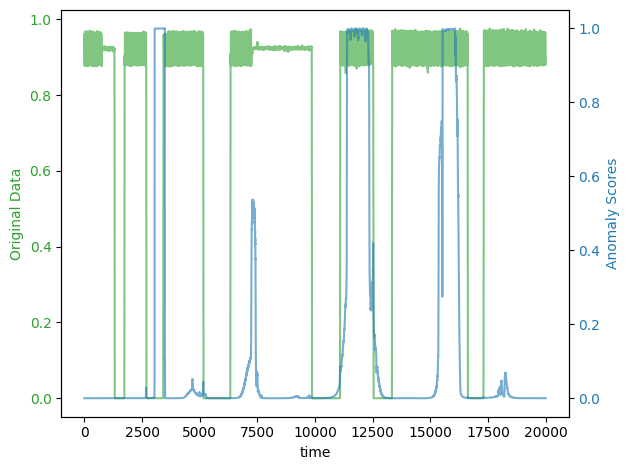

Error in execution: 'str' object is not callable. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in evaluate_ast
    return evaluate_assign(expression, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 177, in evaluate_assign
    result = evaluate_ast(assign.value, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python

"Error in execution: 'str' object is not callable. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='WADI')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

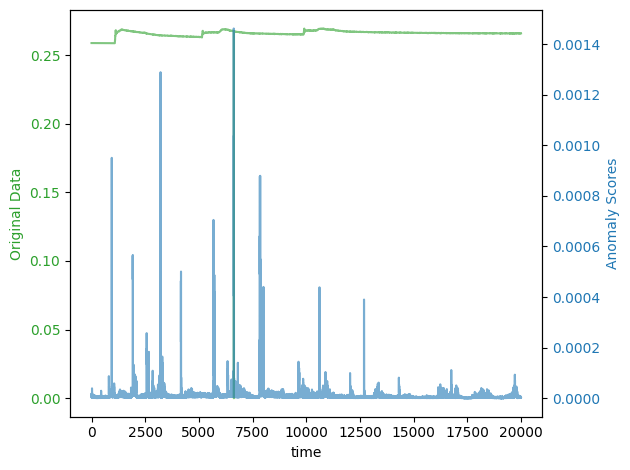

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
dataset_type = 'WADI'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Anomaly plot: {plot}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

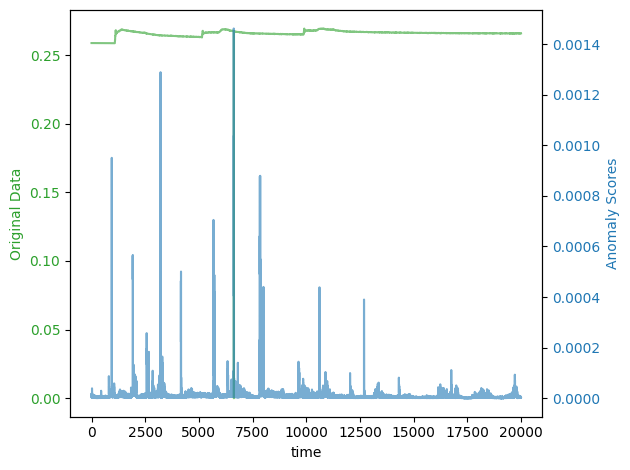

'Anomaly plot: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The anomaly scores are {anomaly_scores}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\Anoma

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = "SWaT"
preprocessed_dataset_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
dataset_mode = "exploitation"

anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)

print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot: {plot}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_cod

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'

anomalies = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test')
print(result)
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

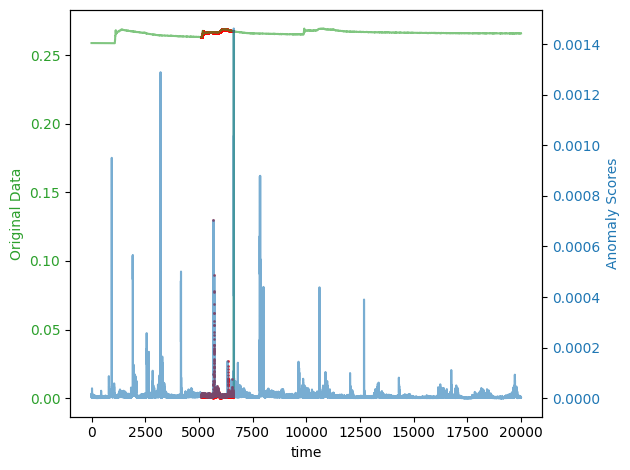

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
AnomalyScores, plot = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='exploitation')
print(f"Anomaly scores: {AnomalyScores}")
print(f"Plot of detected anomalies: {plot}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

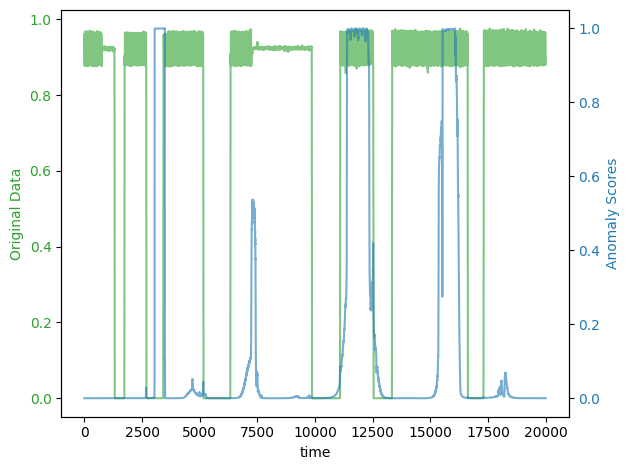

'Plot of detected anomalies: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
analyzed_data = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='exploitation', preprocessed_dataset_folder='/path/to/preprocessed_data')
====
Error in execution: [Errno 2] No such file or directory: '/path/to/preprocessed_data\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in ev

"Error in execution: [Errno 2] No such file or directory: '/path/to/preprocessed_data\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='train')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

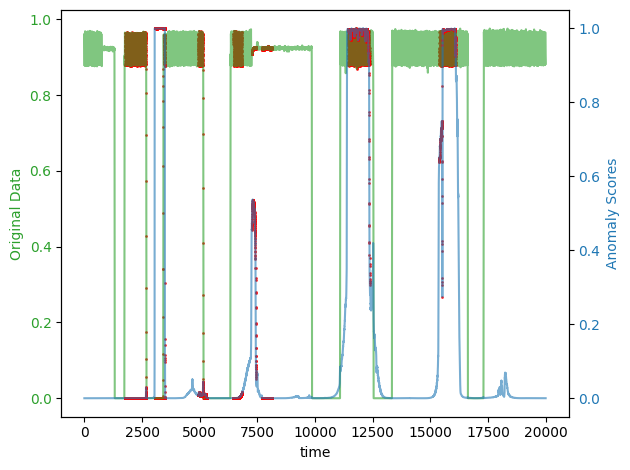

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot: {plot}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

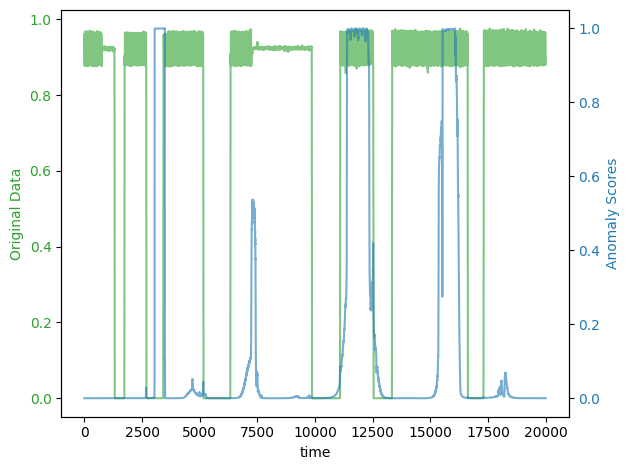

'Plot: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='evaluation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

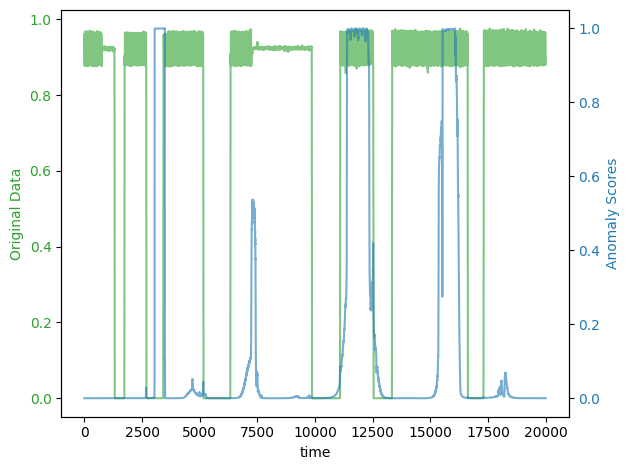

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
mode = 'test'
folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, mode=mode, preprocessed_dataset_folder=folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot visualizing the detected anomalies: {plot}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
SyntaxError: (unicode error) 'unicodeescape' 

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_type = 'WADI'
dataset_mode = 'exploitation'

result = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyB

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 3:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores, _ = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\env

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
anomaly_results = AnomalyBERT_Analyzer(dataset_type='SWaT')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

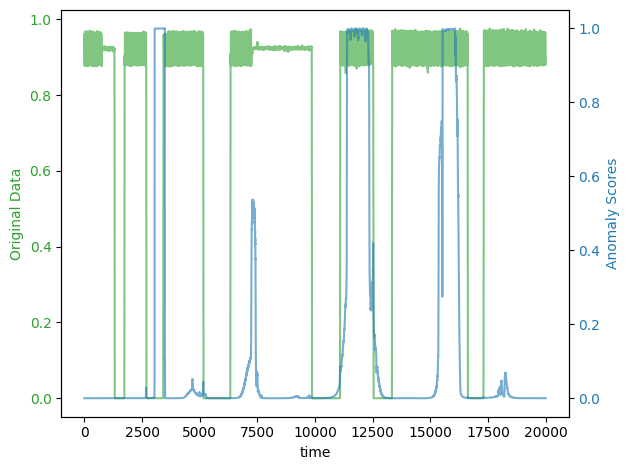

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='WADI')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

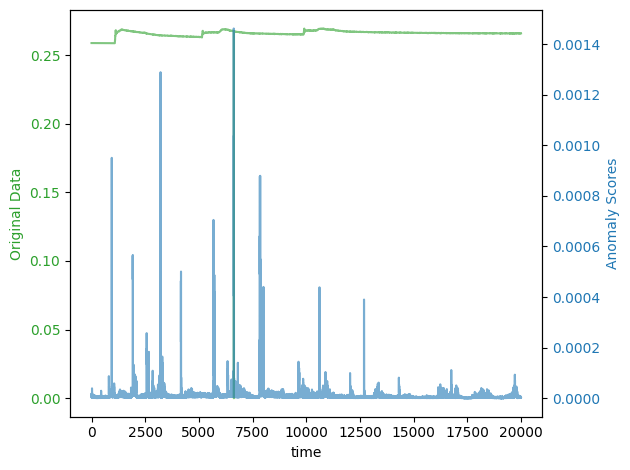

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
anomalies = AnomalyBERT_Analyzer(dataset_type="WADI")
print(f"Anomalies found: {anomalies}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

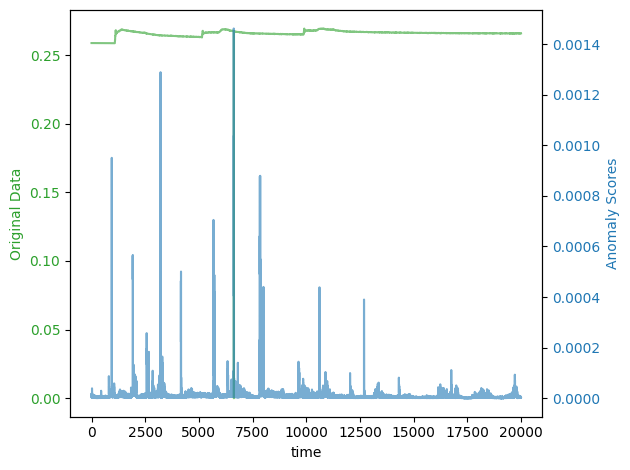

'Anomalies found: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
import os

dataset_type = "SWaT"
preprocessed_dataset_folder = os.path.join(os.sep, 'Users', 'zoiyy', 'OneDrive', 'Documentos', 'DataSets', 'TFM', 'AnomalyBERT', 'processed')
anomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The anomaly scores are {anomaly_scores}")
====
Error in execution: You tried to execute the following code:
import os

dataset_type = "SWaT"
preprocessed_dataset_folder = os.path.join(os.sep, 'Users', 'zoiyy', 'OneDrive', 'Documentos', 'DataSets', 'TFM', 'AnomalyBERT', 'processed')
anomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The anomaly scores are {anomaly

'Error in execution: You tried to execute the following code:\nimport os\n\ndataset_type = "SWaT"\npreprocessed_dataset_folder = os.path.join(os.sep, \'Users\', \'zoiyy\', \'OneDrive\', \'Documentos\', \'DataSets\', \'TFM\', \'AnomalyBERT\', \'processed\')\nanomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)\nprint(f"The anomaly scores are {anomaly_scores}")\nYou got these outputs:\n\nEvaluation stopped at line \'<_ast.Import object at 0x0000019513977CD0>\' because of the following error:\nImport of os is not allowed.. Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
list index out of range
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 423, in extract_action
    split[-2],
IndexError: list index out of range


'ERROR: the agent raised a catastrophic error while trying to generate the code to run.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
processed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_result = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test', preprocessed_dataset_folder=processed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filenam

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
list index out of range
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 423, in extract_action
    split[-2],
IndexError: list index out of range


'ERROR: the agent raised a catastrophic error while trying to generate the code to run.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
dataset_type = "SWaT"
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='exploitation')
print(f"Anomaly scores: {anomaly_scores}")
print(f"Anomaly plot: {plot}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

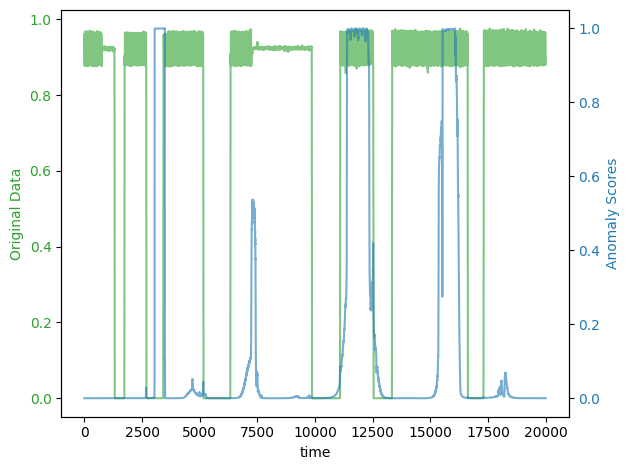

'Anomaly plot: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
output = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='exploitation', preprocessed_dataset_folder='your_preprocessed_data_folder')
====
Error in execution: [Errno 2] No such file or directory: 'your_preprocessed_data_folder\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in eva

"Error in execution: [Errno 2] No such file or directory: 'your_preprocessed_data_folder\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
anomaly_bert_result = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='train')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

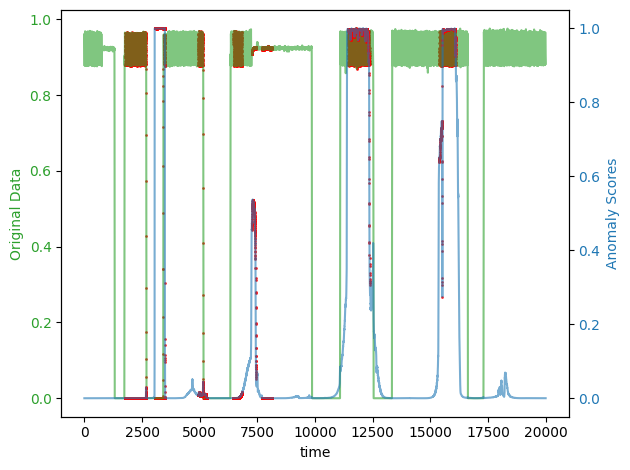

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
anomaly_bert_analysis = AnomalyBERT_Analyzer(dataset_type=dataset_type)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

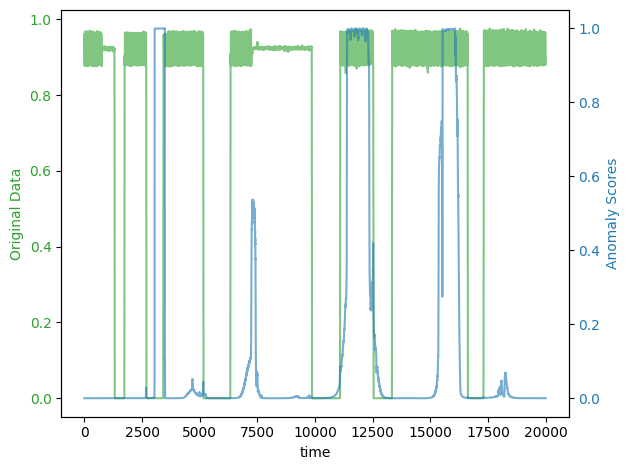

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
dataset_type = "SWaT"
dataset_mode = "evaluation"
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode)
print(f"Anomaly scores generated for {dataset_type} dataset in {dataset_mode} mode.")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

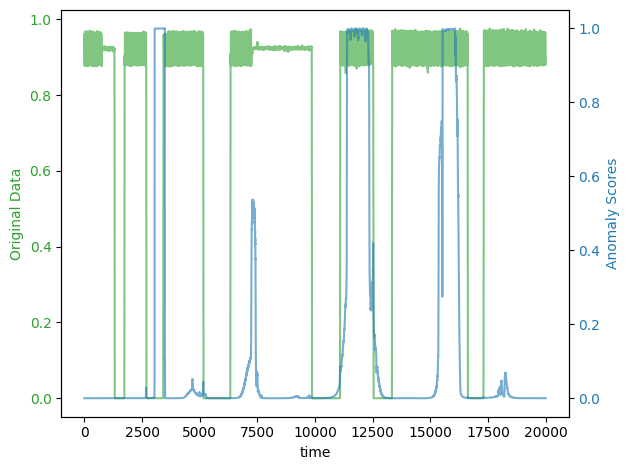

'Anomaly scores generated for SWaT dataset in evaluation mode.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
output = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in pa

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = "SWaT"
preprocessed_dataset_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
dataset_mode = "train"
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(result)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
anomaly_scores_file = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
SyntaxError: (unicode e

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
anomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

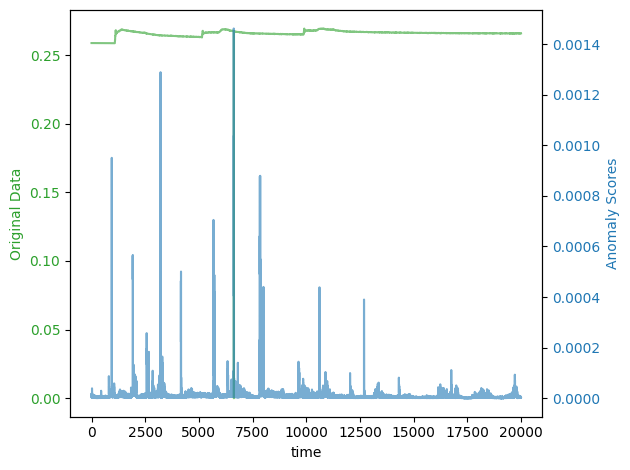

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 3-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
dataset_type = "SWaT"
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = "train"

anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
```
In this code, I define the dataset type as "SWaT", the preprocessed dataset folder, and the dataset mode as "train". Then, I call the `AnomalyBERT_Analyzer` function with these input parameters, a

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \ndataset_type = "SWaT"\npreprocessed_dataset_folder = \'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\'\ndataset_mode = "train"\n\nanomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)\n```\nIn this code, I define the dataset type as "SWaT", the preprocessed dataset folder, and the dataset mode as "train". Then, I call the `AnomalyBERT_Analyzer` function with these input parameters, and store the output in the variables `anomaly_scores` and `plot`.. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
anomaly_result = AnomalyBERT_Analyzer(dataset_type='SWaT')
print(f"Anomaly scores are in {anomaly_result}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

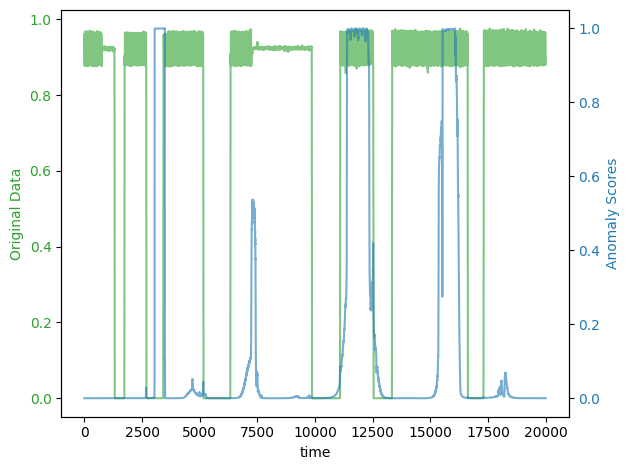

'Anomaly scores are in \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='WADI')
print(f"Anomaly Scores: {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

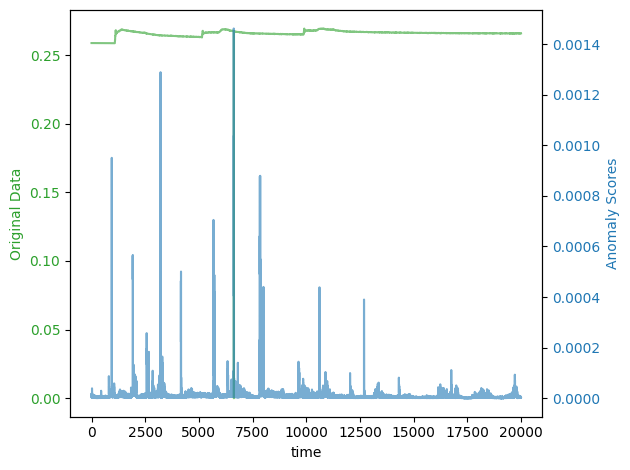

'Anomaly Scores: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
dataset_type = "WADI"
anomaly_results = AnomalyBERT_Analyzer(dataset_type=dataset_type)
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

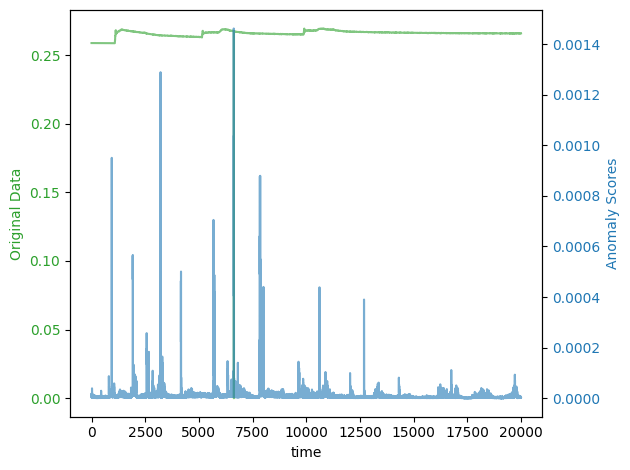

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
preprocessed_dataset_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
dataset_type = "SWaT"
anomaly_scores = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(s

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
folder_path = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
dataset_mode = "exploitation"
dataset_type = "SWaT"
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=folder_path, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
mode = 'test'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
output = AnomalyBERT_Analyzer(dataset_type=dataset_type, mode=mode, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
anomaly_results = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test')
print(anomaly_results)
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

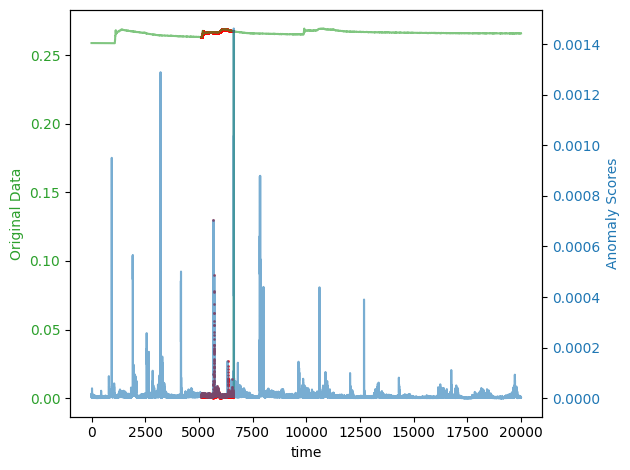

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
dataset_type = 'SWaT'
mode = 'exploitation'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder='', dataset_mode=mode)
====
Error in execution: [Errno 2] No such file or directory: 'SWaT_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in evaluate_ast
    return evalua

"Error in execution: [Errno 2] No such file or directory: 'SWaT_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer('WADI', dataset_mode='exploitation', preprocessed_dataset_folder='path_to_preprocessed_data_folder')
====
Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_data_folder\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in ev

"Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_data_folder\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
anomaly_results = AnomalyBERT_Analyzer('dataset_type': 'SWaT', 'dataset_mode': 'train')
====
Error in execution: The code generated by the agent is not valid.
invalid syntax (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
    anomaly_results = AnomalyBERT_Analyzer('dataset_type': 'SWaT', 'dataset_mode': 'train')
                                                         ^
SyntaxError: invalid syntax

During handling of the above exception, another except

'Error in execution: The code generated by the agent is not valid.\ninvalid syntax (<unknown>, line 1). Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomaly scores: {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

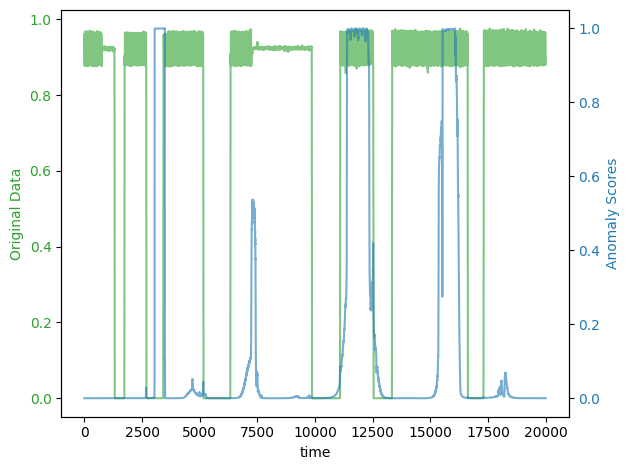

'Anomaly scores: \\'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
anomaly_results = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='evaluation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

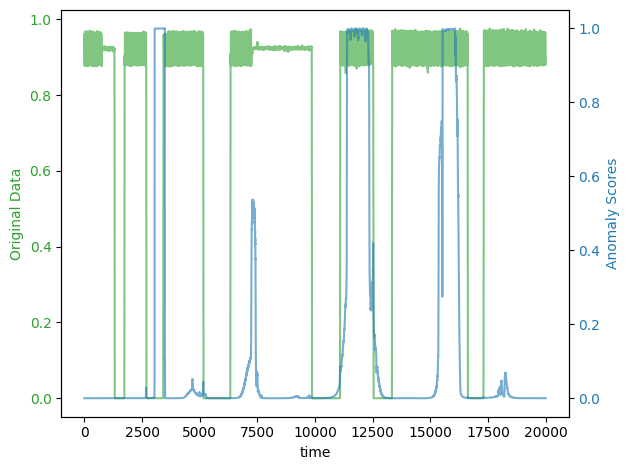

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'test'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, 
                                            preprocessed_dataset_folder=preprocessed_dataset_folder, 
                                            dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_cod

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Visualization: {visualization}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

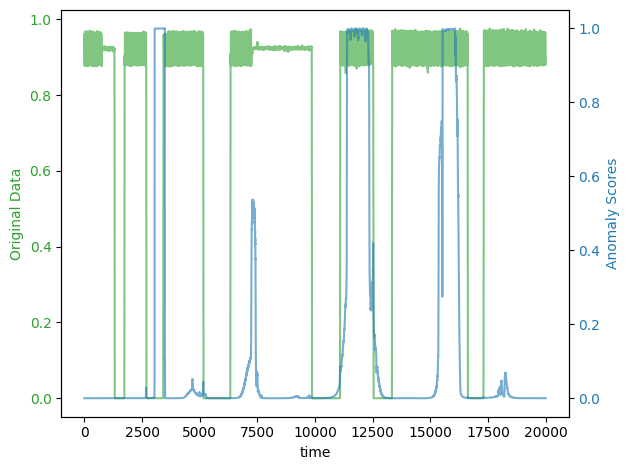

'Visualization: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Visualization: {visualization}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramD

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
dataset_mode = "exploitation"
anomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Visualization: {visualization}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 50

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_type = 'SWaT'
dataset_mode = 'test'
anomaly_scores, plot_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

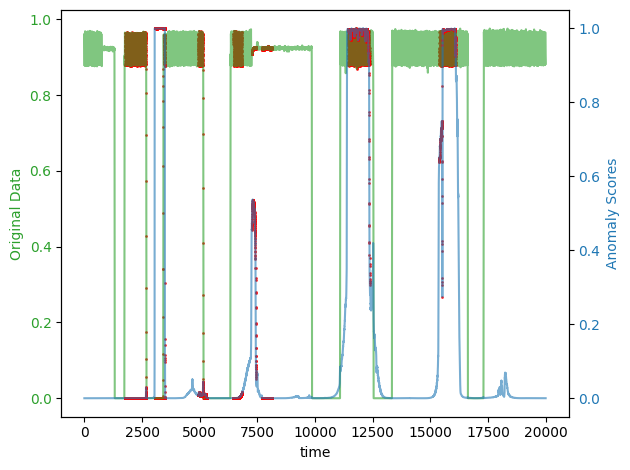

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

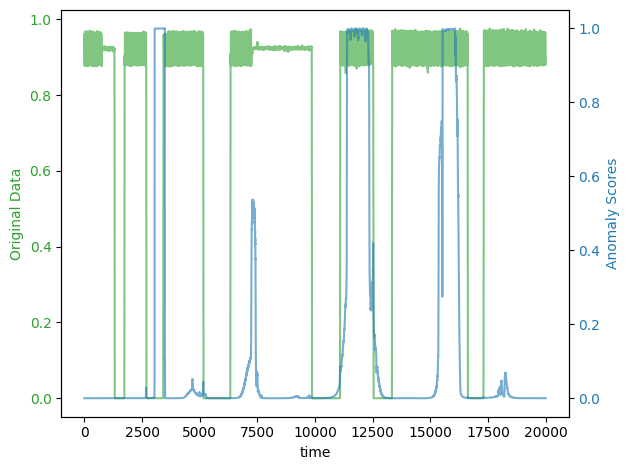

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
anomalies = AnomalyBERT_Analyzer(dataset_type="WADI")
print(f"Anomalies detected: {anomalies}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

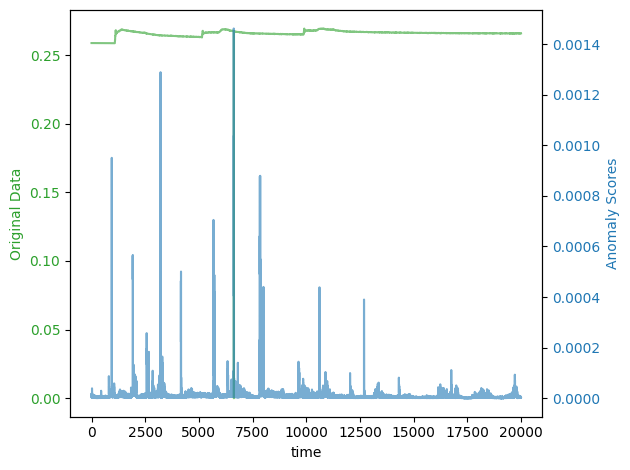

'Anomalies detected: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='WADI')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

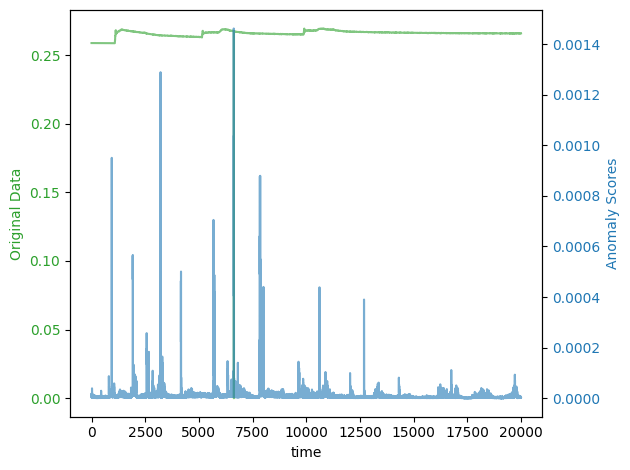

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'

anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)

print(f"Anomaly scores: {anomaly_scores}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.par

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
processed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
answer = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=processed_dataset_folder, dataset_mode='exploitation')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(sour

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
SyntaxErr

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
dataset_type = 'WADI'
dataset_mode = 'test'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode)
print(f"Anomaly scores generated for WADI dataset in test mode.")
```. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 98, in parse_code_blob
    return match.group(1).strip()
AttributeError: 'NoneType' object has no attribute 'group'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Pytho

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \ndataset_type = \'WADI\'\ndataset_mode = \'test\'\nanomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode)\nprint(f"Anomaly scores generated for WADI dataset in test mode.")\n```. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='exploitation')
print(f"The anomaly scores are {anomaly_scores}.")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

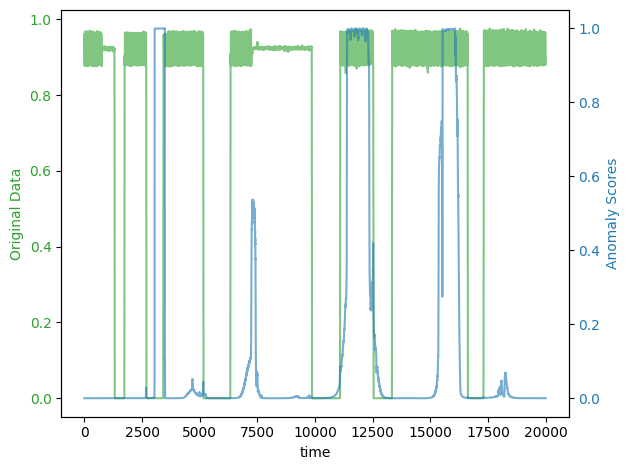

'The anomaly scores are \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
preprocessed_dataset_folder = "path_to_preprocessed_dataset"  # Replace with actual path
dataset_mode = "exploitation"
dataset_type = "WADI"
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly scores: {anomaly_scores}")
====
Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_dataset\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in eval

"Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_dataset\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
anomaly_scores, plot_path = AnomalyBERT_Analyzer("SWaT", dataset_mode="train")
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot path: {plot_path}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

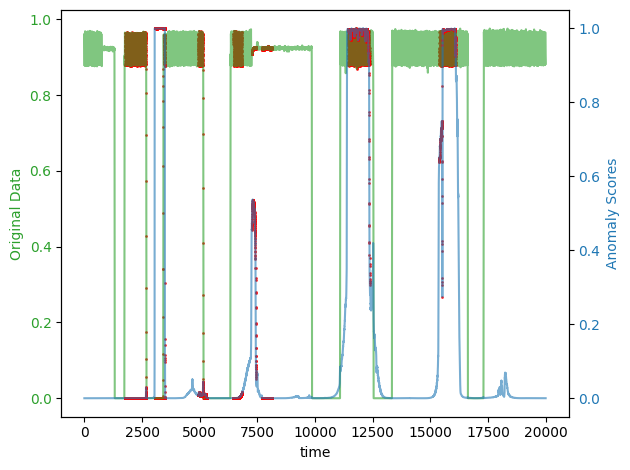

'Plot path: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = "SWaT"
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

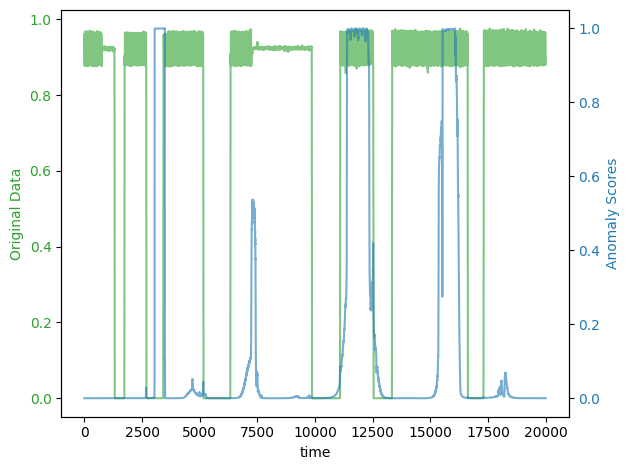

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
dataset_type = 'SWaT'
dataset_mode = 'evaluation'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode)
print(anomaly_scores)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

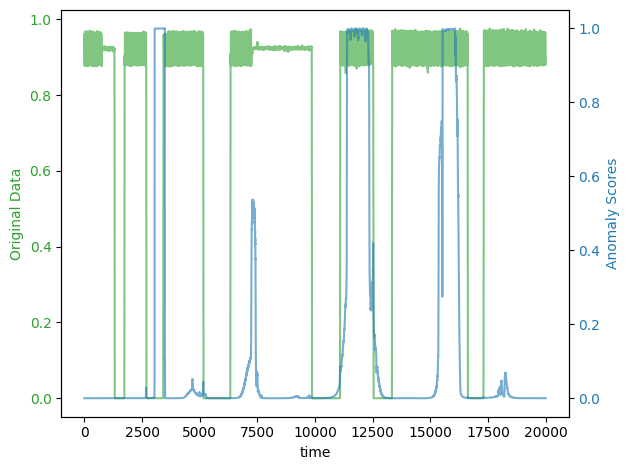

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
WADI_dataset = 'WADI'
dataset_mode = 'test'
processed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'

anomaly_scores, plot_path = AnomalyBERT_Analyzer(dataset_type=WADI_dataset, dataset_mode=dataset_mode, preprocessed_dataset_folder=processed_dataset_folder)
print(anomaly_scores)
print(plot_path)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\Progr

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
results = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return co

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores_files, plot_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores files: {anomaly_scores_files}")
print(f"Plot path: {plot_path}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)


"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
preprocessed_data_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
dataset_mode = 'exploitation'
dataset_type = 'WADI'

anomaly_scores, anomaly_plot = AnomalyBERT_Analyzer('text', dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_data_folder, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_type = 'SWaT'
dataset_mode = 'test'

anomaly_results = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer('SWaT')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

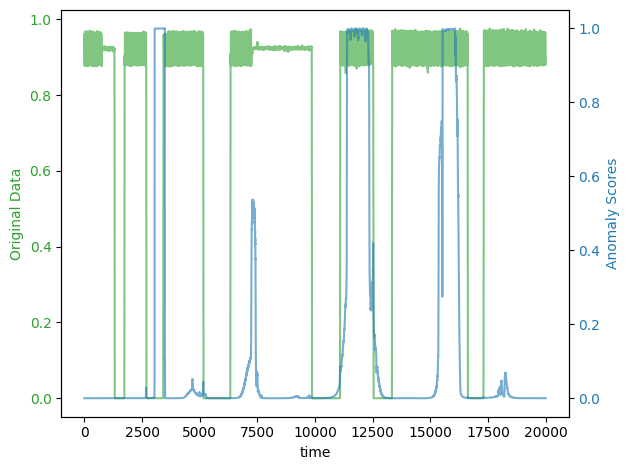

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer('WADI')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

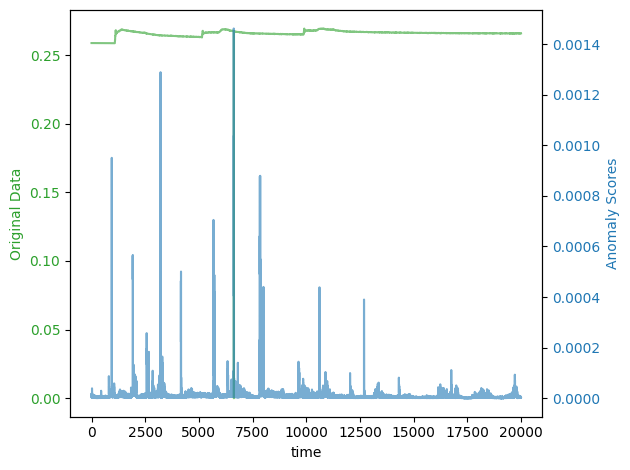

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer('WADI')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

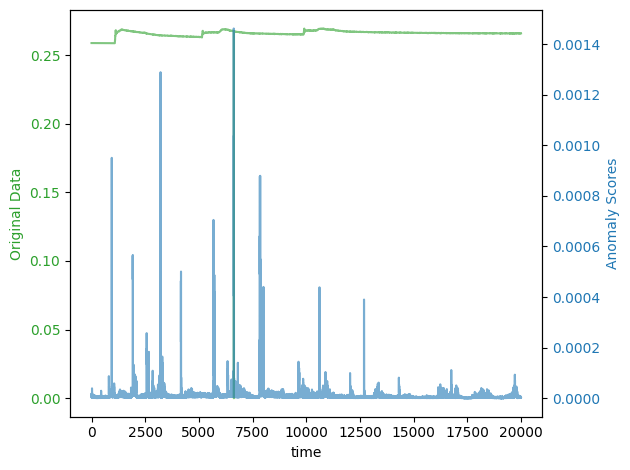

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The anomaly scores are {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

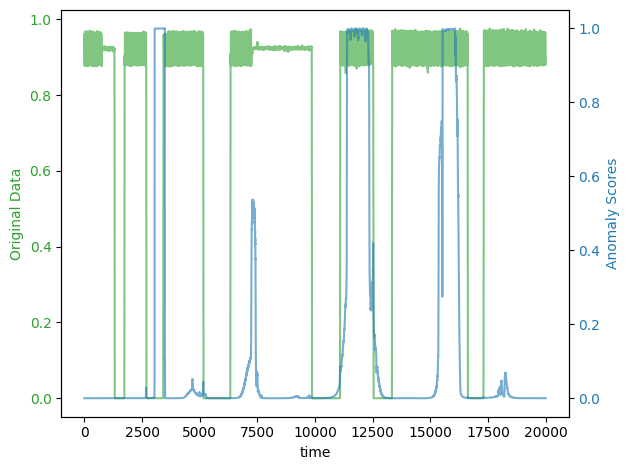

'The anomaly scores are \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
Analyzer = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", lin

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
anomaly_scores_files, plot_path = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>",

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
anomaly_scores_and_plot = AnomalyBERT_Analyzer(dataset_type, dataset_mode='test')
print(f"The paths to the files containing the anomaly scores are {anomaly_scores_and_plot}.")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

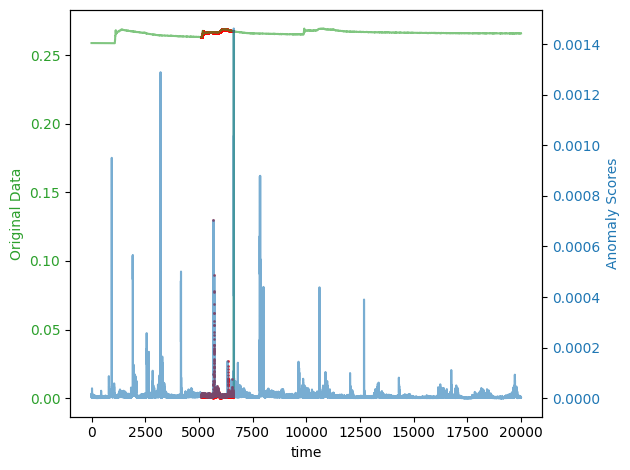

'The paths to the files containing the anomaly scores are \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer('SWaT', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

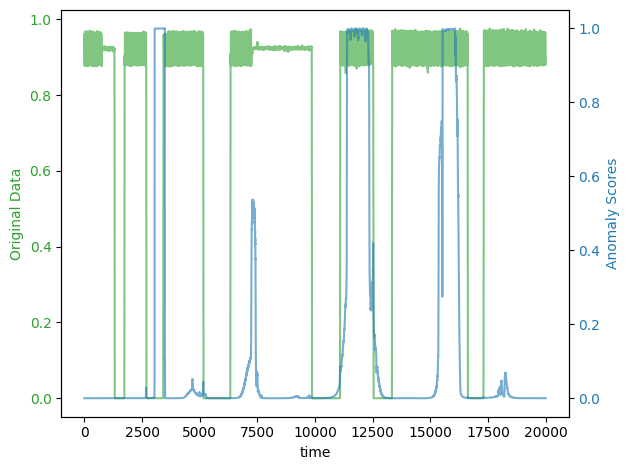

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer('WADI', preprocessed_dataset_folder='path_to_preprocessed_data', dataset_mode='exploitation')
====
Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_data\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in evaluate_a

"Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_data\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
anomaly_result = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='train')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

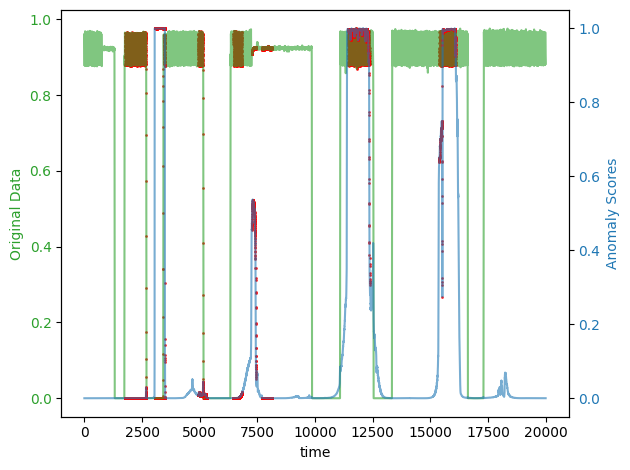

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
anomaly_scores, plot_path = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"The anomaly scores are {anomaly_scores}.")
print(f"The plot path is {plot_path}.")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

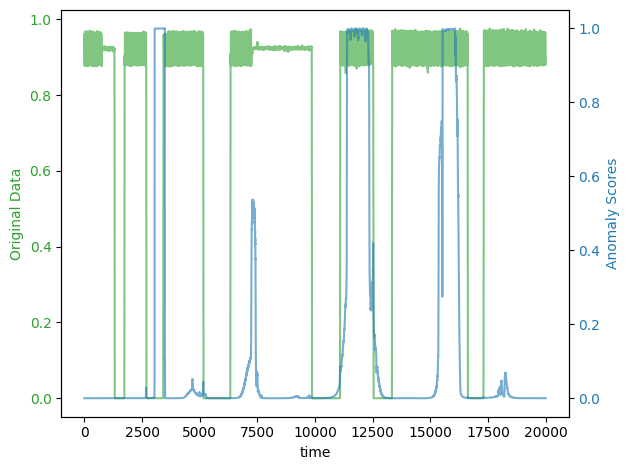

'The plot path is U.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
anomaly_detection = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='evaluation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

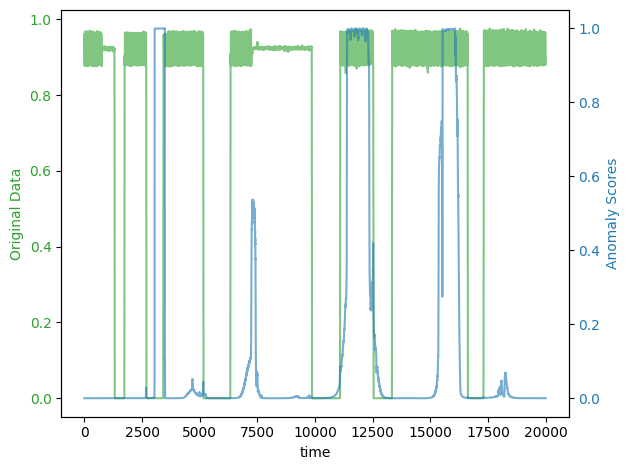

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
detection_results = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
SyntaxErr

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
anomaly_scores_files, plot_path = AnomalyBERT_Analyzer('SWaT', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, fla

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores: {anomaly_scores}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = "/Users/zoiyy/OneDrive/Documents/DataSets/TFM/AnomalyBERT/processed"
dataset_mode = "exploitation"
anomaly_scores, plot_file = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: '/Users/zoiyy/OneDrive/Documents/DataSets/TFM/AnomalyBERT/processed\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\

"Error in execution: [Errno 2] No such file or directory: '/Users/zoiyy/OneDrive/Documents/DataSets/TFM/AnomalyBERT/processed\\\\WADI_test.npy'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [7]:
test_batch.prompt_tests( agent_list , "tool description" , prompt_list )

La salida es demasiado larga y se ha cortado. Como devuelve error al intentar abirlo a parte, seguramente porque se intenta abrir con editor de texto teniendo plots, se ha decidido volver a ejecutar las baterías de pruebas para los agentes que fata por probar.

In [7]:
agent_list.keys()

dict_keys(['1', '1-INDENT', '2', '2-INDENT', '3', '3-INDENT', '4', '4-INDENT'])

In [10]:
remaining_agents_keys_list	= [ '3-INDENT' , '4' , '4-INDENT' ]
remaining_agents_list		= { clave : agent_list[clave] for clave in remaining_agents_keys_list }

'RESULTS FOR TOOL DESCRIPTION 3-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
dataset_type = "SWaT"
preprocessed_dataset_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
answer = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The result is {answer}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\Pro

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
anomaly_scores, visualization = AnomalyBERT_Analyzer(dataset_type='SWaT')
====


Anomaly BERT model for SWaT loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=700, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

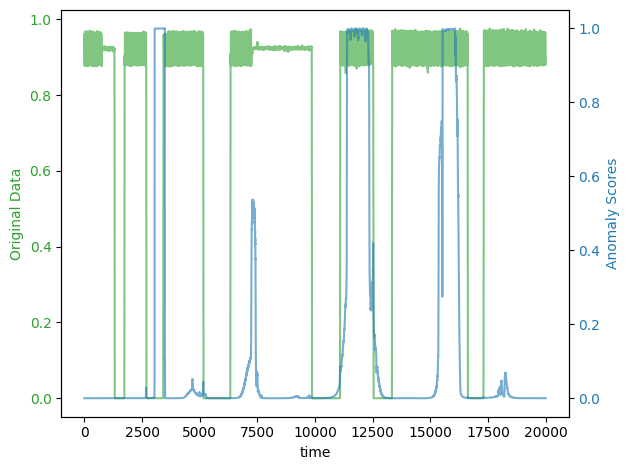

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
dataset_type = 'WADI'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomaly scores: {result}")
====


Anomaly BERT model for WADI loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=976, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

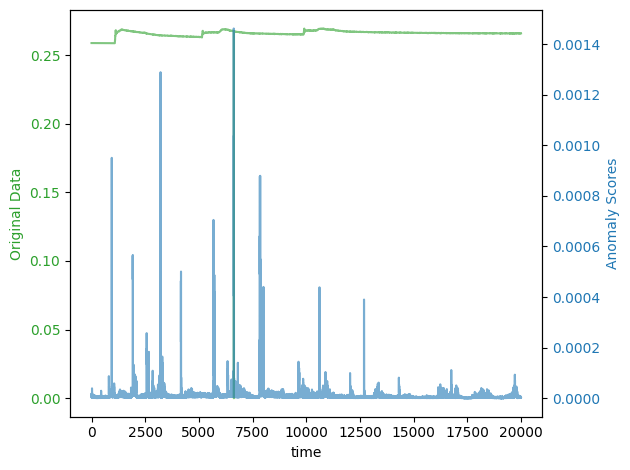

'Anomaly scores: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
dataset_type = 'WADI'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomaly scores file: {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

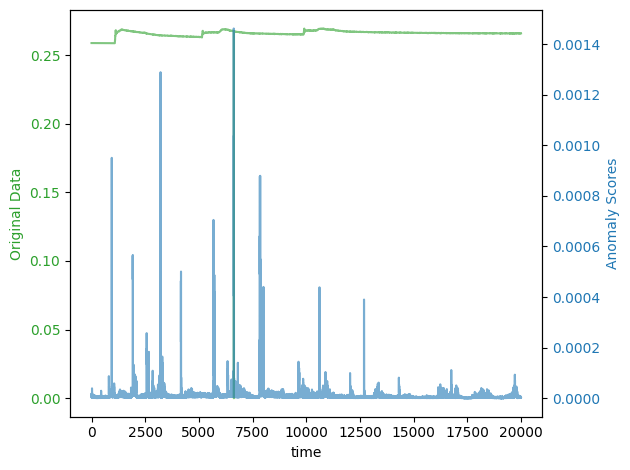

'Anomaly scores file: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
dataset_type = "SWaT"
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder='preprocessed')
print(f"The anomaly scores are {anomaly_scores}.")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", 

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
mode = 'test'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=mode)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 4

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder='', dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 401, in evaluate_ast
    return evaluate_ast(expression.value, stat

"Error in execution: [Errno 2] No such file or directory: 'WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
dataset_type = 'SWaT'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode='exploitation')
print(f"Anomaly scores: {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

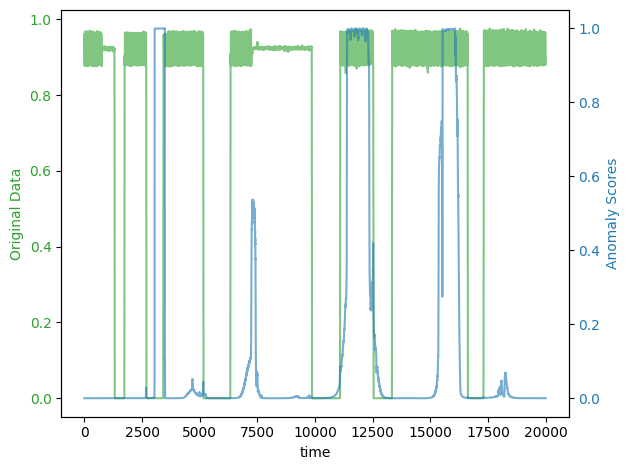

'Anomaly scores: \\'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
anomaly_results = AnomalyBERT_Analyzer(dataset_type="WADI", dataset_mode="exploitation", preprocessed_dataset_folder="folder_path")
====
Error in execution: [Errno 2] No such file or directory: 'folder_path\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in evaluate_ast
    return evalua

"Error in execution: [Errno 2] No such file or directory: 'folder_path\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='train')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

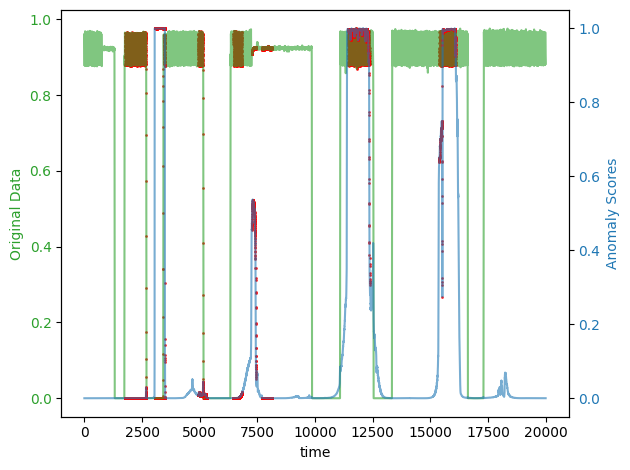

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
```        
dataset_type = "SWaT"
anomaly_scores = AnomalyBERT_Analyzer('dataset_type', dataset_type)
print(f"Anomaly scores have been calculated: {anomaly_scores}")
```<end_code>
. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 98, in parse_code_blob
    return match.group(1).strip()
AttributeError: 'NoneType' object has no attribute 'group'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \n```        \ndataset_type = "SWaT"\nanomaly_scores = AnomalyBERT_Analyzer(\'dataset_type\', dataset_type)\nprint(f"Anomaly scores have been calculated: {anomaly_scores}")\n```<end_code>\n. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
dataset_type = 'SWaT'
dataset_mode = 'evaluation'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type, dataset_mode=dataset_mode)
print(f"Anomaly Scores: {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

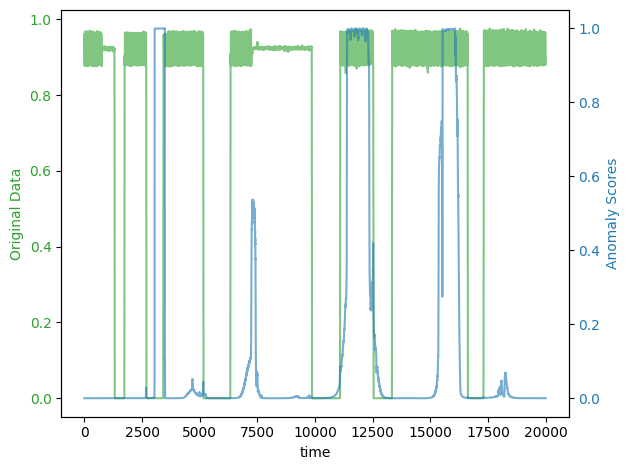

'Anomaly Scores: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_bert_analyzer = AnomalyBERT_Analyzer()
results = anomaly_bert_analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"The analysis results are {results}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expr

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 3). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
list index out of range
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 423, in extract_action
    split[-2],
IndexError: list index out of range


'ERROR: the agent raised a catastrophic error while trying to generate the code to run.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = '/Users/zoiyy/OneDrive/Documentos/DataSets/TFM/AnomalyBERT/processed'
output_file_paths, plot_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====


5056 windows are computed.
10048 windows are computed.
/Users/zoiyy/OneDrive/Documentos/DataSets/TFM/AnomalyBERT/processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

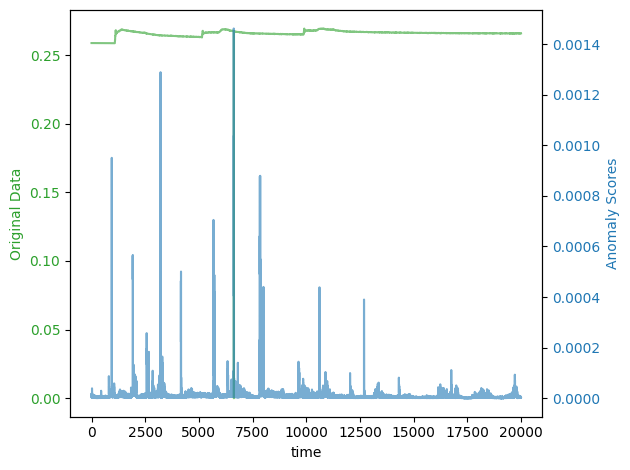

'/Users/zoiyy/OneDrive/Documentos/DataSets/TFM/AnomalyBERT/processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_mode = 'exploitation'
anomaly_scores, _ = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly scores have been generated.")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expres

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
anomaly_result = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mo

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='SWaT')
====


Anomaly BERT model for SWaT loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=700, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

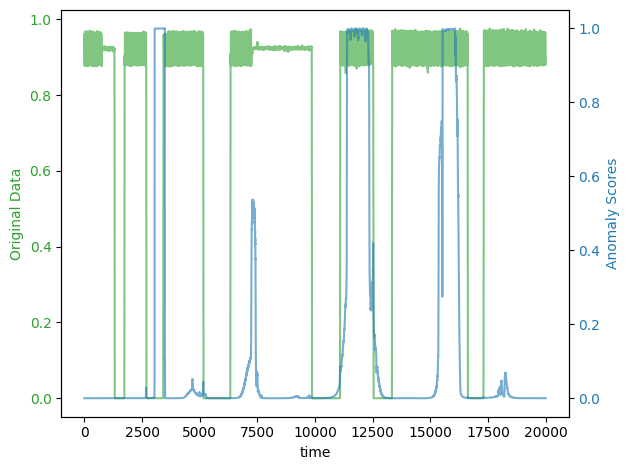

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
dataset_type = 'WADI'
anomaly_results = AnomalyBERT_Analyzer(dataset_type)
====


Anomaly BERT model for WADI loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=976, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

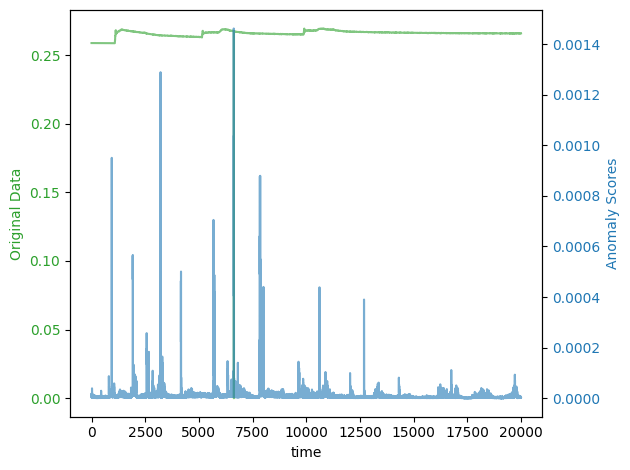

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
anomalies = AnomalyBERT_Analyzer(dataset_type='WADI')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

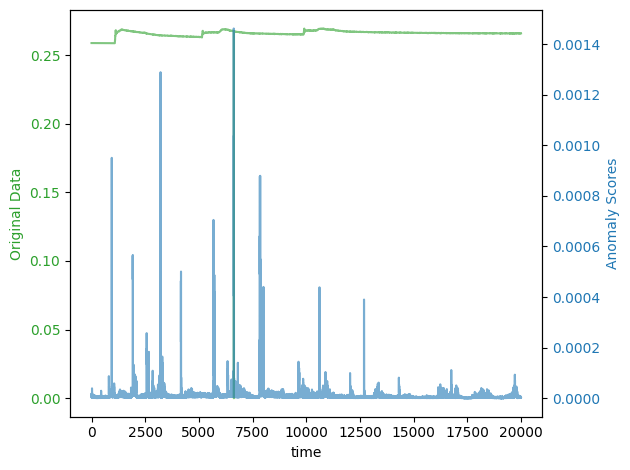

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed')
print(f"Anomaly Scores: {anomaly_scores}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

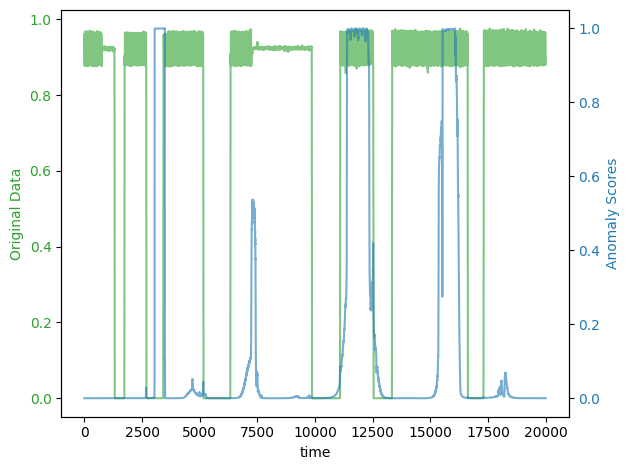

'Anomaly Scores: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'SWaT'
anom_bert_approx = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
anom_bert_approx.anomaly_detection()
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return co

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = 'WADI'
dataset_mode = 'test'
preprocessed_dataset_folder = '\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

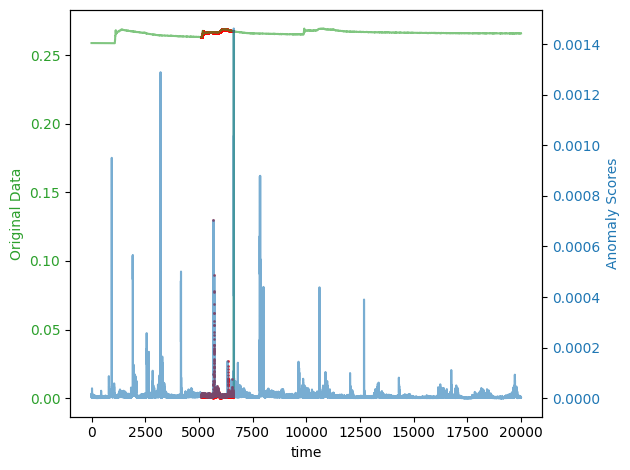

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
anomaly_detector = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

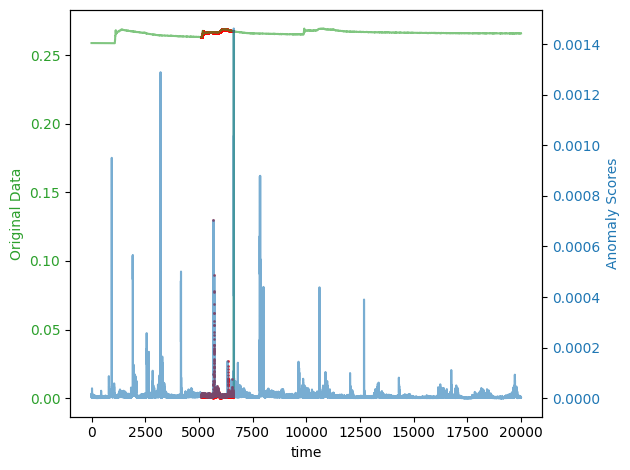

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

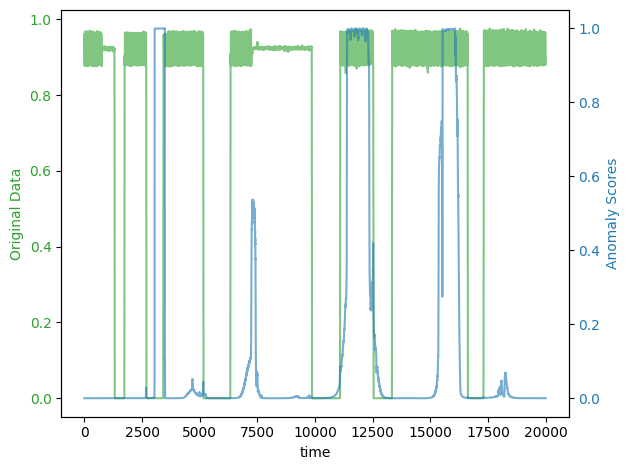

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='exploitation', preprocessed_dataset_folder='<path_to_preprocessed_data>')
====
Error in execution: [Errno 22] Invalid argument: '<path_to_preprocessed_data>\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 360, in evaluat

"Error in execution: [Errno 22] Invalid argument: '<path_to_preprocessed_data>\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
```<end_code>
. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 98, in parse_code_blob
    return match.group(1).strip()
AttributeError: 'NoneType' object has no attribute 'group'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 556, in run
    code_action = self.parse_code_blob(code_action)
  File "C:\Users\zoiyy\AppData\Roami

"Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \n```<end_code>\n. Be sure to provide correct code"

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot: {plot}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

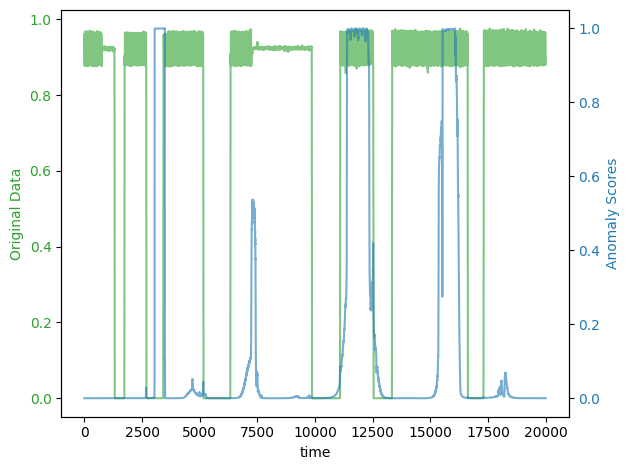

'Plot: U'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
dataset_type = 'SWaT'
dataset_mode = 'evaluation'
result = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode)
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

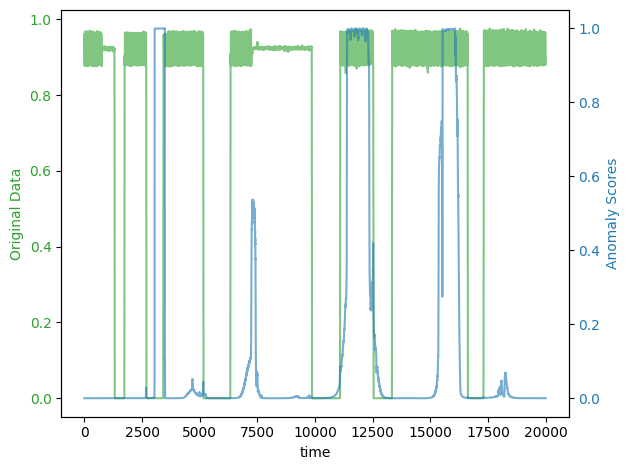

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
SyntaxError: (unicod

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = "SWaT"
preprocessed_dataset_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
results = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Results: {results}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\li

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = "\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed"
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source,

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

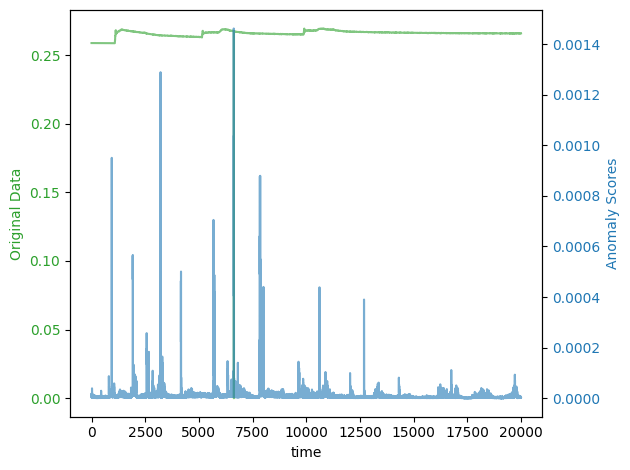

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'===================================================================================================='

'===================================================================================================='

'RESULTS FOR TOOL DESCRIPTION 4-INDENT:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Could you analyse for anomalies the SWaT satelite dataset stored in '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'? The dataset is meant for testing and ans it is already preprocessed.
==== Agent is executing the code below:
anomaly_scores, plot_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='test')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    ret

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Analyze anomalies in the 'SWaT' dataset using default settings.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer('SWaT')
====


Anomaly BERT model for SWaT loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=700, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

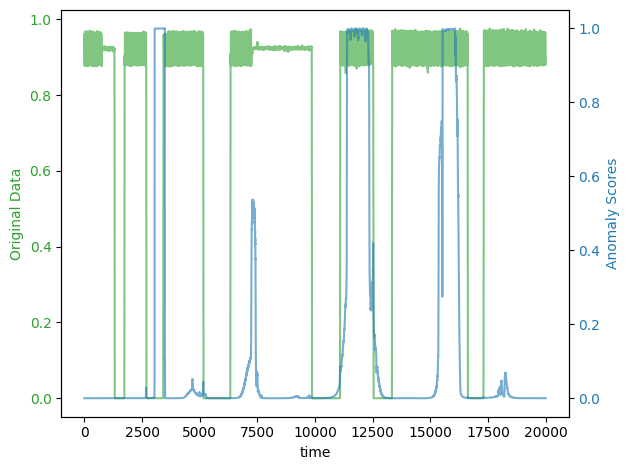

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Detect anomalies in the 'WADI' dataset and return the results.
==== Agent is executing the code below:
dataset_type = 'WADI'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"Anomaly scores: {anomaly_scores}")
====


Anomaly BERT model for WADI loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=976, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

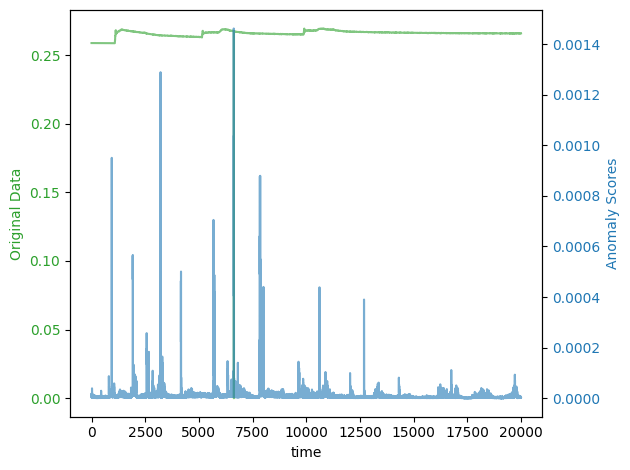

'Anomaly scores: \\'

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Identify anomalies in the 'WADI' dataset with default parameters.
==== Agent is executing the code below:
anomaly_scores, plot_path = AnomalyBERT_Analyzer('WADI')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

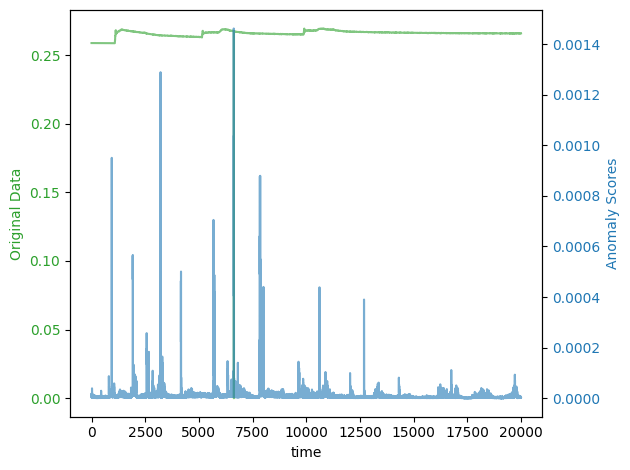

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Test the 'SWaT' dataset using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the anomaly scores.
==== Agent is executing the code below:
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_type = 'SWaT'
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    ret

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Analyze the 'SWaT' dataset in 'exploitation' mode, using the data in the folder '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type="SWaT", preprocessed_dataset_folder="\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed", dataset_mode="exploitation")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Run the tool in 'test' mode on the 'WADI' dataset from the directory '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
SyntaxError: (uni

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Run the anomaly detection on the 'WADI' dataset in 'test' mode.
==== Agent is executing the code below:
anomaly_score_files, plot_path = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

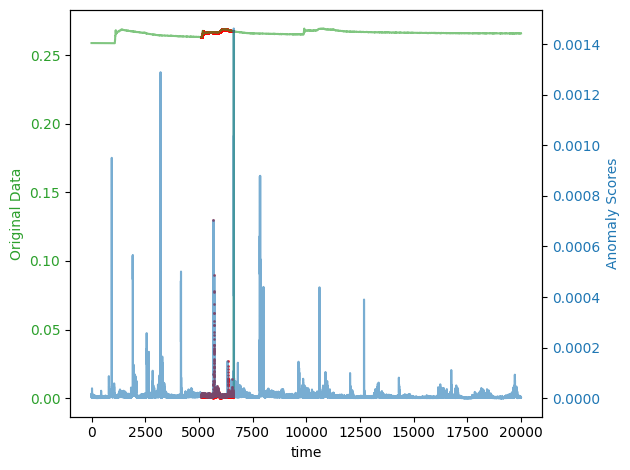

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Run an 'exploitation' analysis on the 'SWaT' dataset to detect any anomalies.
==== Agent is executing the code below:
anomaly_results = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

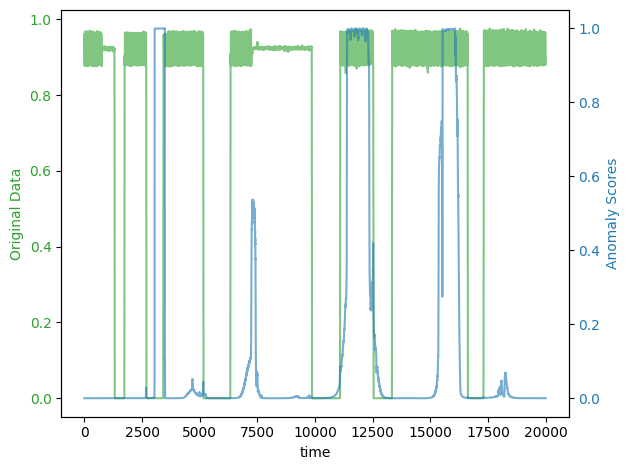

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Detect anomalies in the 'WADI' dataset in 'exploitation' mode with preprocessed data.
==== Agent is executing the code below:
dataset_type = "WADI"
dataset_mode = "exploitation"
preprocessed_dataset_folder = "path_to_preprocessed_data"
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot of anomalies: {plot}")
====
Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_data\\WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python

"Error in execution: [Errno 2] No such file or directory: 'path_to_preprocessed_data\\\\WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Analyze the 'SWaT' dataset in 'train' mode without specifying a preprocessed dataset folder.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer('SWaT', dataset_mode='train')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

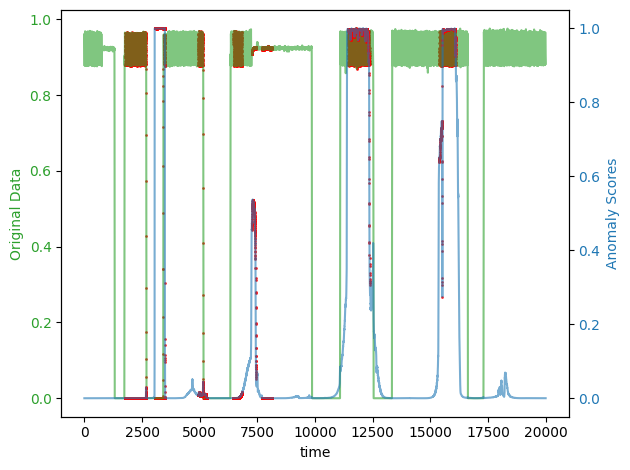

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Run anomaly detection on the 'SWaT' dataset.
==== Agent is executing the code below:
anomaly_scores, visuals = AnomalyBERT_Analyzer(dataset_type='SWaT')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

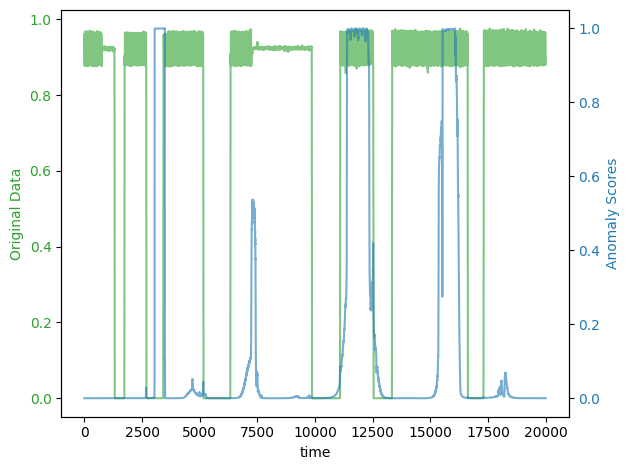

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Use the analysing tool on 'SWaT' dataset with mode 'evaluation'.
==== Agent is executing the code below:
output = AnomalyBERT_Analyzer(dataset_type='SWaT', dataset_mode='evaluation')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

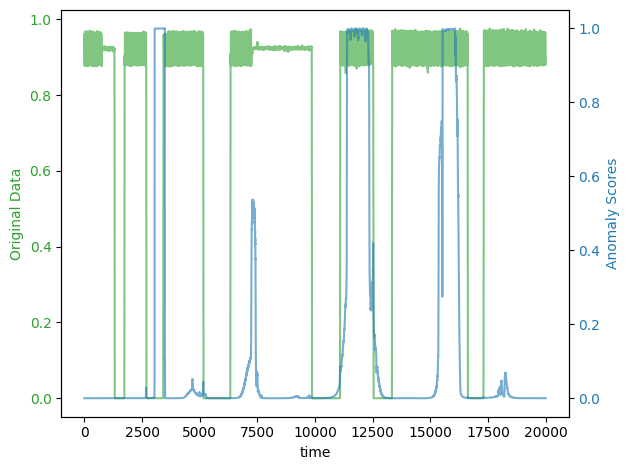

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Run the analysis on 'WADI' dataset in 'test' mode using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
result = AnomalyBERT_Analyzer(dataset_type='WADI', dataset_mode='test', preprocessed_dataset_folder='\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed')
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,
  File "<unknown>", line 1
SyntaxError: (unicod

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analyse for anomaly detection model on the 'SWaT' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' and return the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
anomaly_scores_paths, plot_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 2). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Test the anomaly detection model on the 'WADI' dataset using data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'.
==== Agent is executing the code below:
compatible_dataset_folder = '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed'
dataset_type = 'WADI'
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=compatible_dataset_folder)
print(f"Anomaly scores: {anomaly_scores}")
print(f"Plot: {plot}")
====
Error in execution: The code generated by the agent is not valid.
(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs

"Error in execution: The code generated by the agent is not valid.\n(unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \\UXXXXXXXX escape (<unknown>, line 1). Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Analyze the 'WADI' dataset for anomalies using preprocessed data from '\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed' in 'exploitation' mode.
==== Agent is executing the code below:
anomaly_scores, plot = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=r'\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed', dataset_mode='exploitation')
====


5056 windows are computed.
10048 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

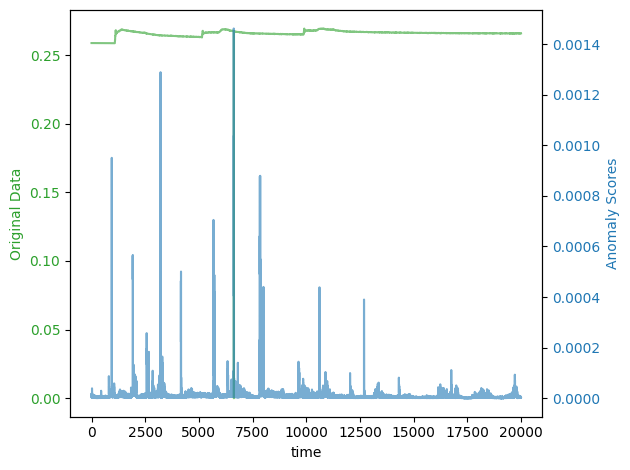

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\WADI_test_results.npy'

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [12]:
test_batch.prompt_tests( remaining_agents_list , "tool description" , prompt_list )